# getFoodSaveCaptcha

In [ ]:
import concurrent.futures
import requests

def getCaptchaPic(i):
    res=requests.get("https://waste.epa.gov.tw/export/include/CAPTCHA/CAPTCHA_image.asp?8776")
    with open(r"D:\trydata\textConsider\rawPic/"+str(i)+".png",'wb') as f:
        f.write(res.content)
        
with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    graph = [executor.submit(getCaptchaPic,i) for i in range(10000)]
#     for future in concurrent.futures.as_completed(graph):
#         try:
#             data = future.result()
#         except Exception as e:
#             print(e)
#             print("zzz")
#             pass
        
# end = time.time()  
# print("-----------------")
# print(end-start)







# getNumber

Populating the interactive namespace from numpy and matplotlib


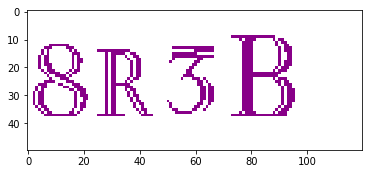

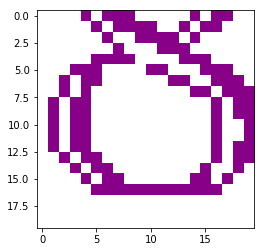

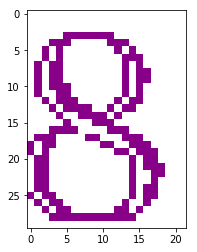

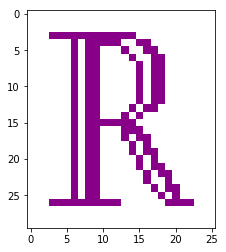

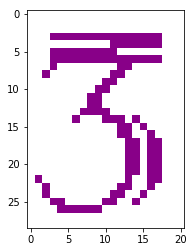

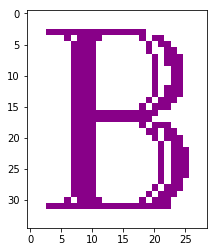

In [12]:
import PIL
import numpy
%pylab inline
from matplotlib import pyplot as plt
import cv2

pil_image =PIL.Image.open(r"D:\trydata\textConsider\rawPic\1.png").convert("RGB")
pil_image
open_cv_image=numpy.array(pil_image)
plt.imshow(open_cv_image)
imgray=cv2.cvtColor(open_cv_image,cv2.COLOR_BGR2GRAY)# 箱圖片轉換成灰
ret, thresh=cv2.threshold(imgray,127,255,0)#門檻 色彩不夠pass
image,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)#找到輪廓(contour)
cnts=sorted([(c,cv2.boundingRect(c)[0]) for c in contours],key=lambda x:x[1]) #將輪廓由找到的矩形邊界，以第一個值(表示左邊界)排序
ary=[]
for (c,_) in cnts:#將各邊界篩選不要的(寬度過短 高度過短 最外框都不要)
    (x,y,w,h)=cv2.boundingRect(c)
#         print((x,y,w,h))
    if w>11 and h>=7 and w!=120:
        if x-2>0:
            ary.append((x-2,y-2,w+4,h+4))
        else:
            ary.append((x,y,w+4,h+4))
n=0
for (x,y,w,h) in ary:#將各邊界截圖 然後存取
    fig=plt.figure()
    roi=open_cv_image[y:y+h,x:x+w]
    thresh=roi.copy()
    plt.imshow(thresh)
    plt.savefig(r"D:\trydata\textConsider\numPic/{}_{}.png".format(1,n),dpi=100)
    n+=1

Populating the interactive namespace from numpy and matplotlib


D:\anaconda\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

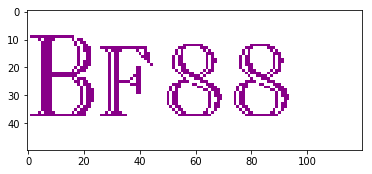

In [ ]:
import PIL
import numpy
%pylab inline
from matplotlib import pyplot as plt
import cv2

for i in range(4000):
    pil_image =PIL.Image.open(r"D:\trydata\textConsider\rawPic\{}.png".format(i)).convert("RGB") #開啟圖片
    open_cv_image=numpy.array(pil_image)#把圖片變成array
    plt.imshow(open_cv_image)
    imgray=cv2.cvtColor(open_cv_image,cv2.COLOR_BGR2GRAY)# 箱圖片轉換成灰
    ret, thresh=cv2.threshold(imgray,127,255,0)#門檻 色彩不夠pass
    image,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)#找到輪廓(contour)
    cnts=sorted([(c,cv2.boundingRect(c)[0]) for c in contours],key=lambda x:x[1]) #將輪廓由找到的矩形邊界，以第一個值(表示左邊界)排序
    ary=[]
    for (c,_) in cnts:#將各邊界篩選不要的(寬度過短 高度過短 最外框都不要)
        (x,y,w,h)=cv2.boundingRect(c)
#         print((x,y,w,h))
        if w>11 and h>=7 and w!=120:
            if x-2>0:
                ary.append((x-2,y-2,w+4,h+4))
            else:
                ary.append((x,y,w+4,h+4))
    n=0
    for (x,y,w,h) in ary:#將各邊界截圖 然後存取
        fig=plt.figure()
        roi=open_cv_image[y:y+h,x:x+w]
        thresh=roi.copy()
        plt.imshow(thresh)
        plt.savefig(r"D:\trydata\textConsider\numPic/{}_{}.png".format(i,n),dpi=100)
        n+=1
        
        


In [ ]:
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
import PIL
import numpy
basewidth=50
pil_image=PIL.Image.open(r"D:\trydata\textConsider\classification\3\2_1.png").convert("1")
wpercent=(basewidth/float(pil_image.size[0]))
hsize=int((float(pil_image.size[1])*float(wpercent)))
img=pil_image.resize((basewidth,hsize),PIL.Image.ANTIALIAS)
img

# https://youtube.com/results?search_query=如何使用機器學習方法破解驗證碼

In [2]:
%pylab inline
import os
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
import PIL
import numpy
digits=[]
labels=[]
basewidth=50 #寬度全變50
fig=plt.figure(figsize=(20,20))
cnt=0
#畫圖用
# fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in os.listdir(r"D:\trydata\textConsider\classification"):
    for img in os.listdir(r"D:\trydata\textConsider\classification\{}/".format(i)):
        pil_image=PIL.Image.open(r"D:\trydata\textConsider\classification\{}\{}".format(i,img)).convert('1')
        wpercent=(basewidth/float(pil_image.size[0])) #寬度全變50 找到寬度跟原本的比例
        hsize=int((float(pil_image.size[1])*float(wpercent))) #找到高度比例
        img=pil_image.resize((basewidth,hsize),PIL.Image.ANTIALIAS) #將高度也變成一樣比例
        #畫圖用
#         try:
#             ax=fig.add_subplot(10,12,cnt+1,xticks=[],yticks=[])
#             ax.imshow(img,cmap=plt.cm.binary,interpolation='nearest')
#             ax.text(0,7,str(i),color='red',fontsize=20)
#         except:
#             pass
        cnt+=1
        digits.append([pixel for pixel in iter(img.getdata())])#將資料變成一為矩陣 變成data
        labels.append(i) #資料夾名稱變成label

Populating the interactive namespace from numpy and matplotlib


In [7]:
len(digits)

323

In [3]:
import numpy
digit_ary=numpy.array(digits)

In [5]:
digit_ary.shape

(323, 1650)

In [438]:
from sklearn.preprocessing import StandardScaler #數值標準化
scaler =StandardScaler()
scaler.fit(digit_ary)
X_scaled=scaler.transform(digit_ary)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [439]:
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(80,80,80),activation="logistic",max_iter=3000)
mlp.fit(X_scaled,labels)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80, 80, 80), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [440]:
from sklearn.externals import joblib
joblib.dump(mlp,r'D:\trydata\textConsider\model\captcha.pkl')

['D:\\trydata\\textConsider\\model\\captcha.pkl']

In [441]:
mlp=joblib.load(r'D:\trydata\textConsider\model\captcha.pkl')

In [442]:
predicted=mlp.predict(X_scaled)

In [443]:
target=numpy.array(labels)

In [444]:
predicted==target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [445]:
predicted

array(['2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6',
       '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '8',
       '8', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F

In [446]:
%pylab inline
import os
import PIL
import requests
import time
fig =plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)


res=requests.get("https://waste.epa.gov.tw/export/include/CAPTCHA/CAPTCHA_image.asp?8776")
with open(r"D:\trydata\textConsider\predict/aa.png",'wb') as f:
    f.write(res.content)

    


Populating the interactive namespace from numpy and matplotlib


['S' 'T' 'N' 'B']
STNB


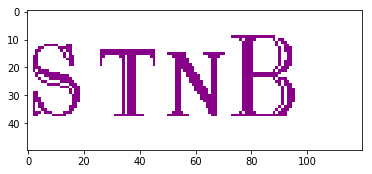

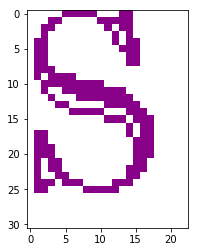

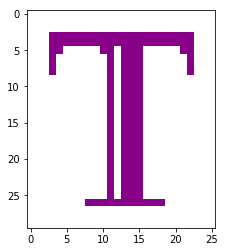

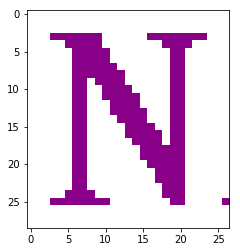

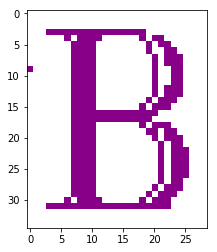

In [447]:
pil_image =PIL.Image.open(r"D:\trydata\textConsider\predict/aa.png").convert("RGB")
open_cv_image=numpy.array(pil_image)
plt.imshow(open_cv_image)
imgray=cv2.cvtColor(open_cv_image,cv2.COLOR_BGR2GRAY)
ret, thresh=cv2.threshold(imgray,127,255,0)
image,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnts=sorted([(c,cv2.boundingRect(c)[0]) for c in contours],key=lambda x:x[1])
ary=[]
for (c,_) in cnts:
    (x,y,w,h)=cv2.boundingRect(c)
#         print((x,y,w,h))
    if w>11 and h>=7 and w!=120:
        if x-2>0:
            ary.append((x-2,y-2,w+4,h+4))
        else:
            ary.append((x,y,w+4,h+4))
n=0
for i in os.listdir(r"D:\trydata\textConsider\predict\numPic/"):
    os.remove(r"D:\trydata\textConsider\predict\numPic/"+i)
    
for (x,y,w,h) in ary:
    fig=plt.figure()
    roi=open_cv_image[y:y+h,x:x+w]
    thresh=roi.copy()
#     ax=fig.add
    plt.imshow(thresh)
    plt.savefig(r"D:\trydata\textConsider\predict\numPic/aa_{}.png".format(n),dpi=100)
    n+=1
    
    
data=[]
basewidth=50
fig=plt.figure(figsize=(20,20))
cnt=0
for idx,img in enumerate(os.listdir(r"D:\trydata\textConsider\predict\numPic/")):
    pil_image=PIL.Image.open(r"D:\trydata\textConsider\predict\numPic\{}".format(img)).convert('1')
    wpercent=(basewidth/float(pil_image.size[0]))
    hsize=int((float(pil_image.size[1])*float(wpercent)))
    img=pil_image.resize((basewidth,hsize),PIL.Image.ANTIALIAS)
    data.append([pixel for pixel in iter(img.getdata())])
    
scaler=StandardScaler()
scaler.fit(data)
data_scaled=scaler.transform(data)

print(mlp.predict(data_scaled))

print("".join(mlp.predict(data_scaled)).replace("xx",""))

Populating the interactive namespace from numpy and matplotlib


D:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


['7' 'S' '2' '6']
7S26
['6' 'xx' 'K' 'D' '6']
6KD6
['C' 'xx' '8' 'P' 'P']
C8PP


D:\anaconda\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


['5' '3' 'P' 'P']
53PP
['E' 'D' 'H' 'H']
EDHH
['N' '3' 'T' 'xx' '8']
N3T8
['T' 'H' 'xx' '8' 'S']
TH8S
['3' 'D' '6' 'E']
3D6E
['xx' 'K' 'xx' '8' 'S' '6']
K8S6
['2' 'xx' 'E' 'T' '3']
2ET3
['F' '5' 'xx' '7' '6']
F576
['3' '5' 'xx' 'K' '6']
35K6
['3' 'xx' '8' 'R' 'F']
38RF
['E' 'xx' '8' 'C' 'E']
E8CE
['3' 'xx' '8' 'R' 'D']
38RD
['C' '6' 'C' 'xx' '7']
C6C7
['C' '2' 'xx' 'xx' '8' 'P']
C28P
['N' 'P' 'T' 'S']
NPTS
['D' 'H' 'T' 'S']
DHTS
['6' 'C' 'T' 'T']
6CTT
['6' 'F' '6' 'xx' '8']
6F68
['H' 'F' 'xx' 'K' 'xx' '8']
HFK8
['xx' '8' 'P' 'F' 'N']
8PFN
['N' 'R' 'R' 'B']
NRRB
['xx' '7' 'xx' '7' 'xx' 'K' '3']
77K3
['P' 'E' 'xx' 'E']
PEE
['E' 'xx' '8' 'F' 'E']
E8FE
['P' 'D' 'F' 'D']
PDFD
['P' 'xx' 'K' 'N' 'N']
PKNN
['2' 'xx' 'B' 'xx' 'K' '5']
2BK5
['xx' '8' 'H' 'E' 'F']
8HEF
['3' '3' 'xx' '7' 'R']
337R
['C' 'R' 'S' '2' 'xx']
CRS2
['xx' 'K' '5' 'S' 'S']
K5SS
['xx' '7' '5' 'D' 'R']
75DR
['T' 'D' '6' '6']
TD66
['xx' 'K' 'xx' '8' '6' '6']
K866
['B' 'E' '3' 'H']
BE3H
['P' 'F' 'B' 'xx' '7']
PFB7
['R' '2' 'xx

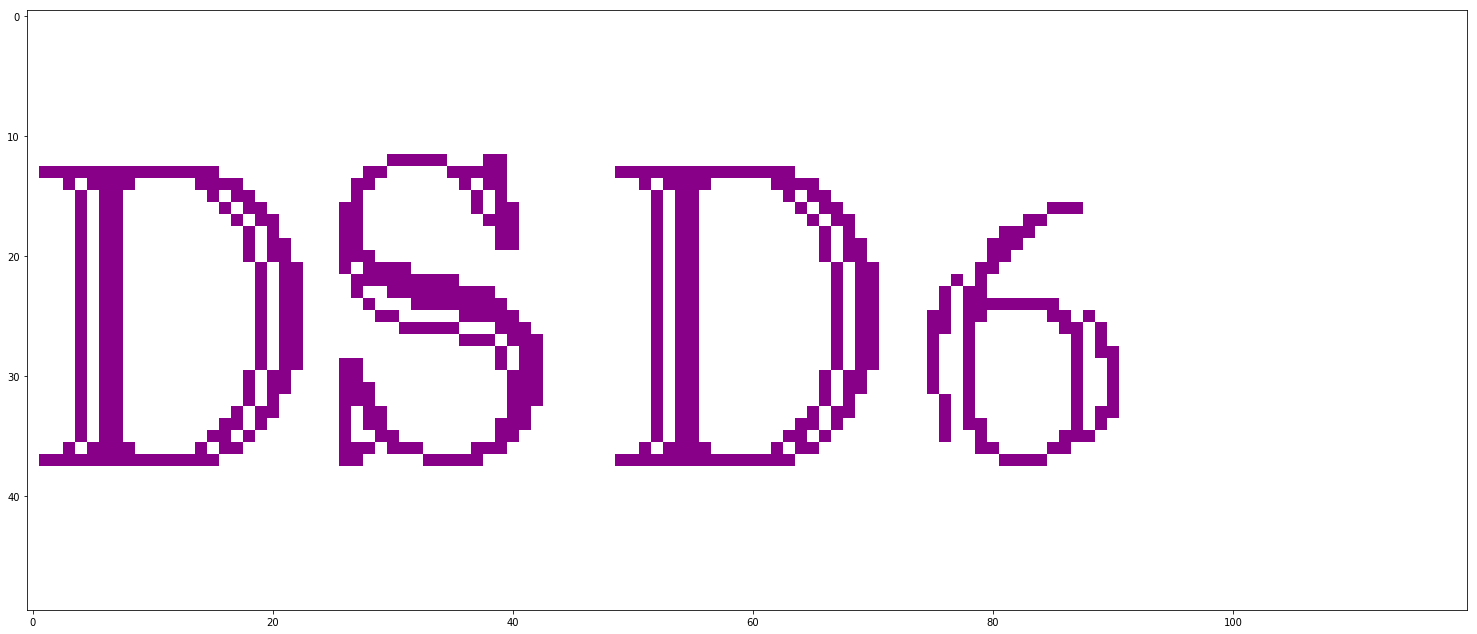

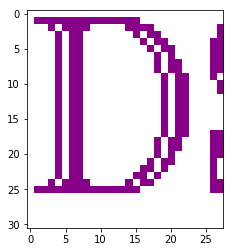

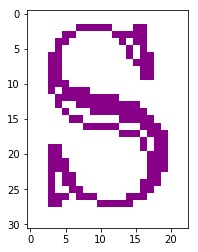

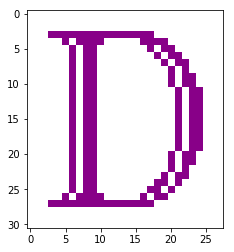

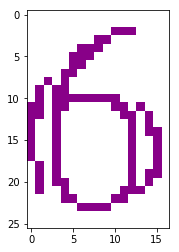

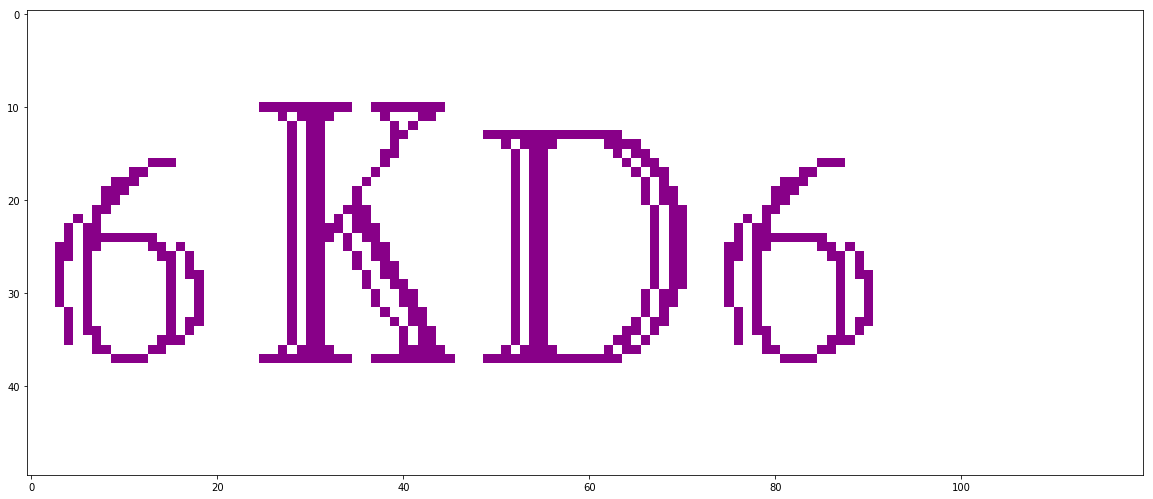

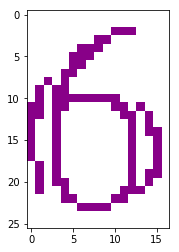

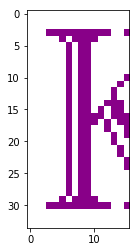

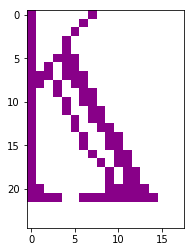

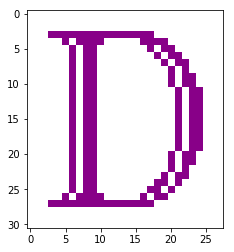

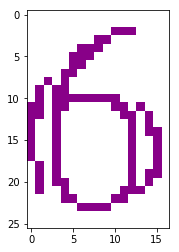

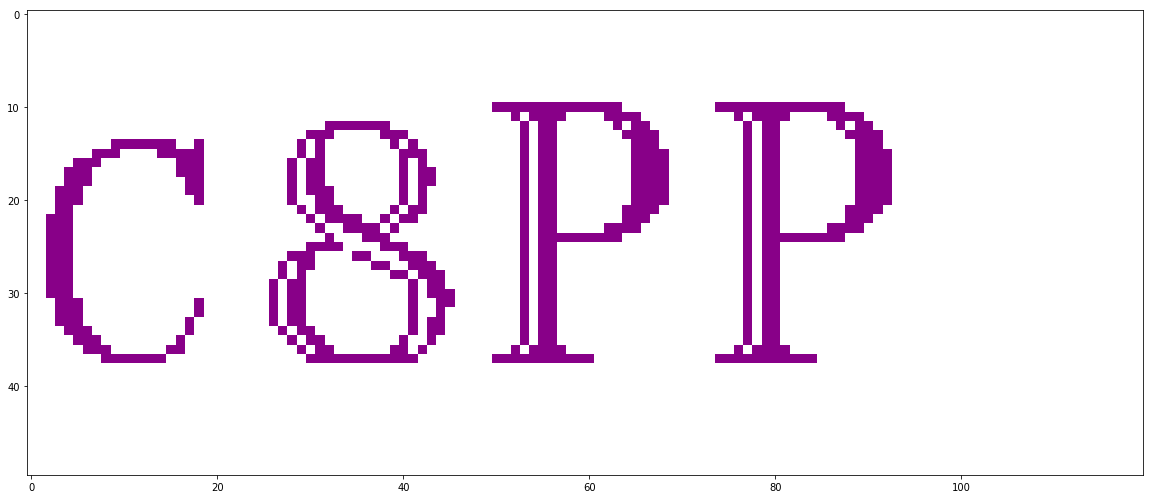

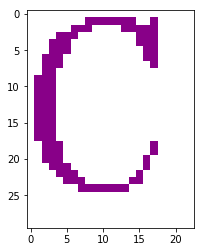

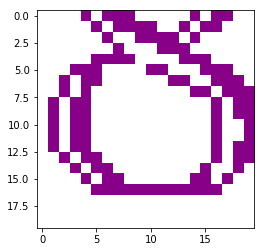

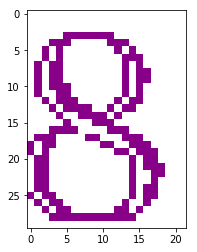

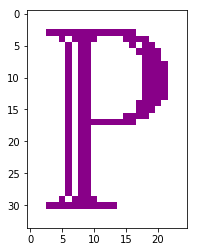

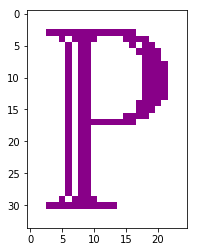

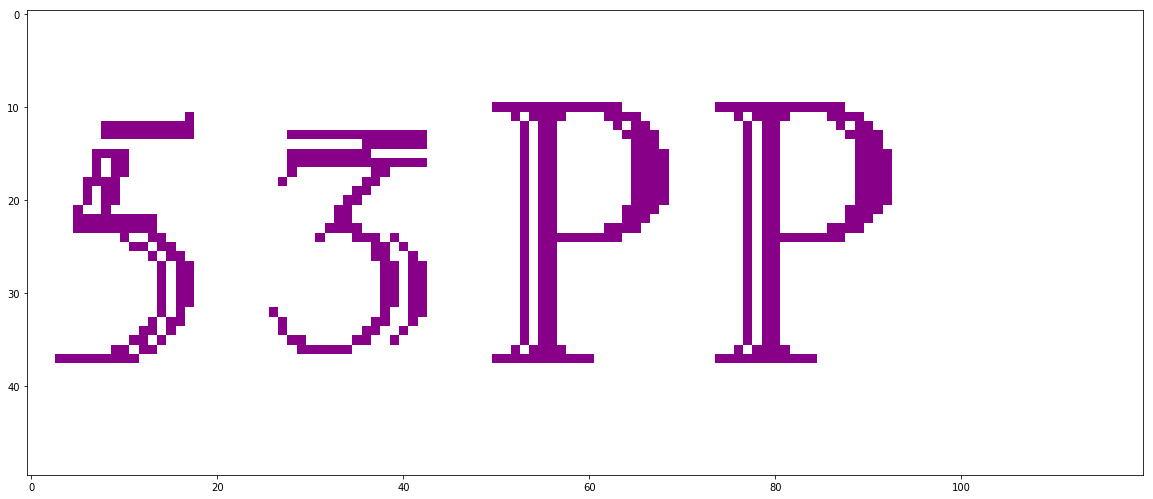

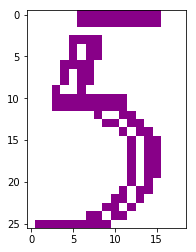

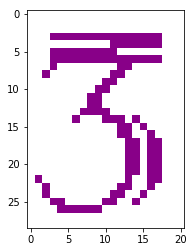

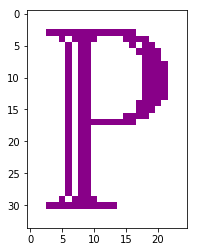

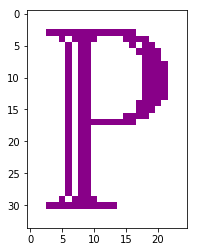

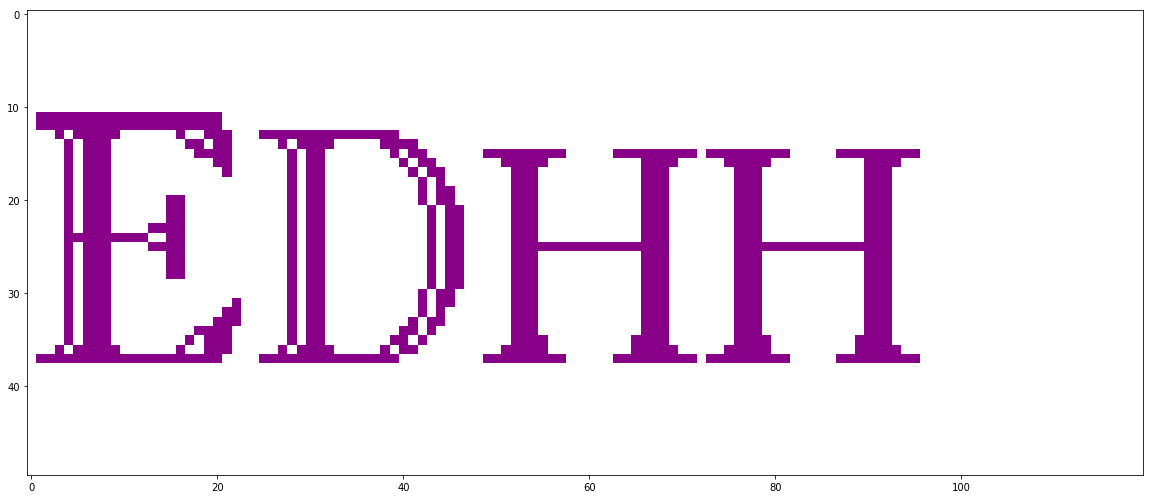

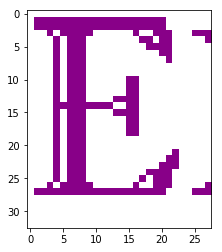

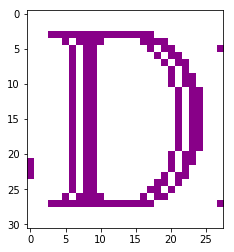

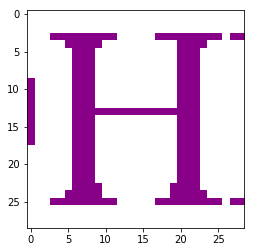

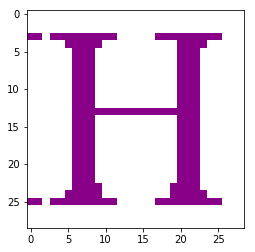

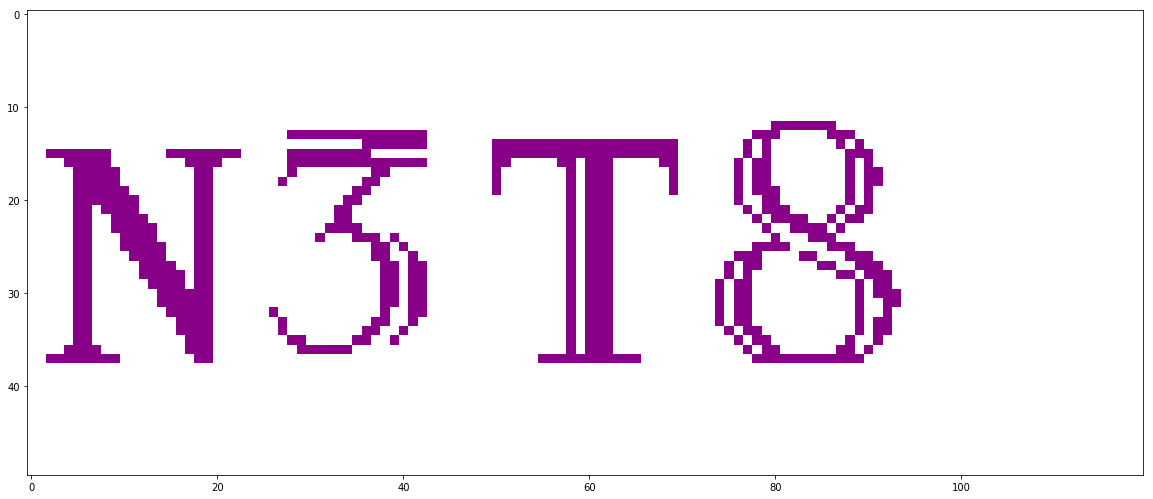

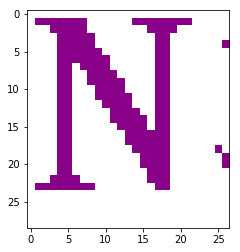

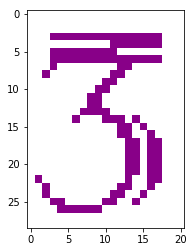

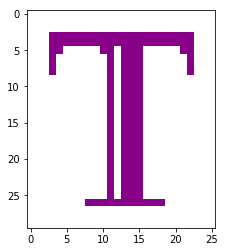

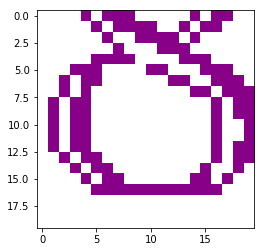

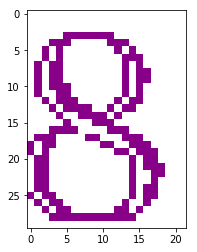

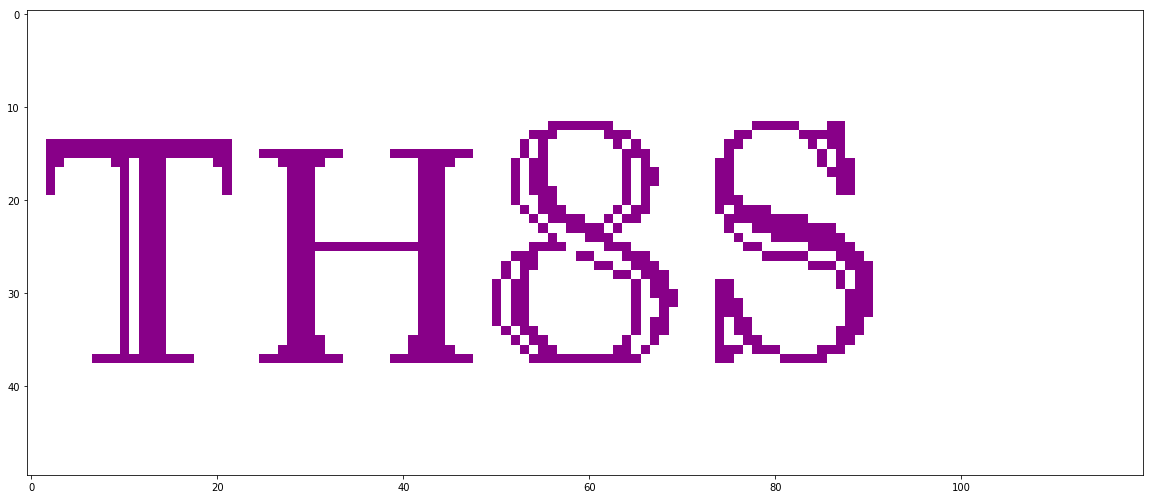

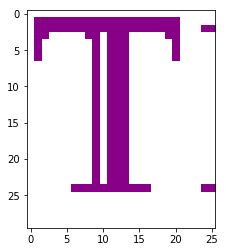

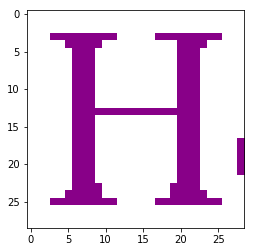

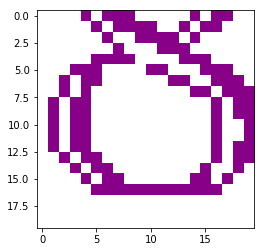

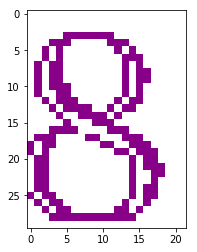

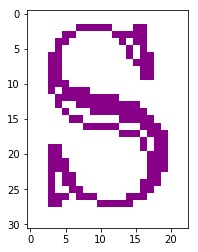

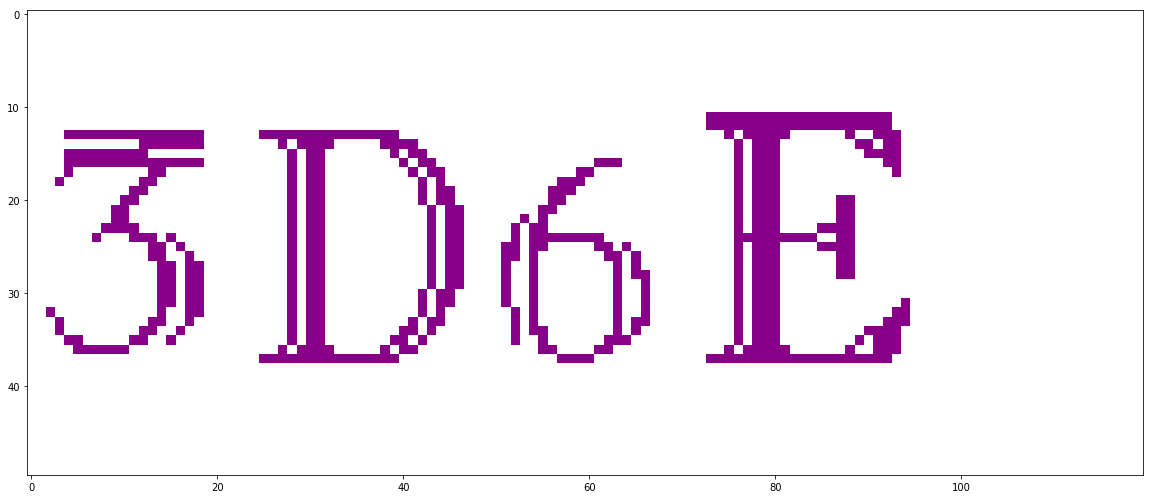

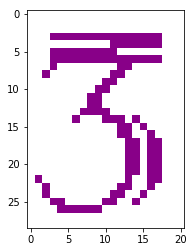

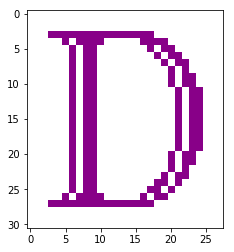

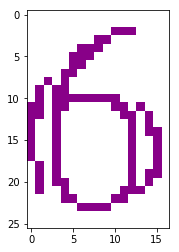

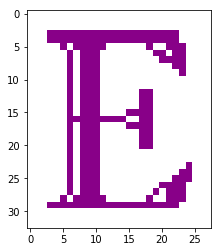

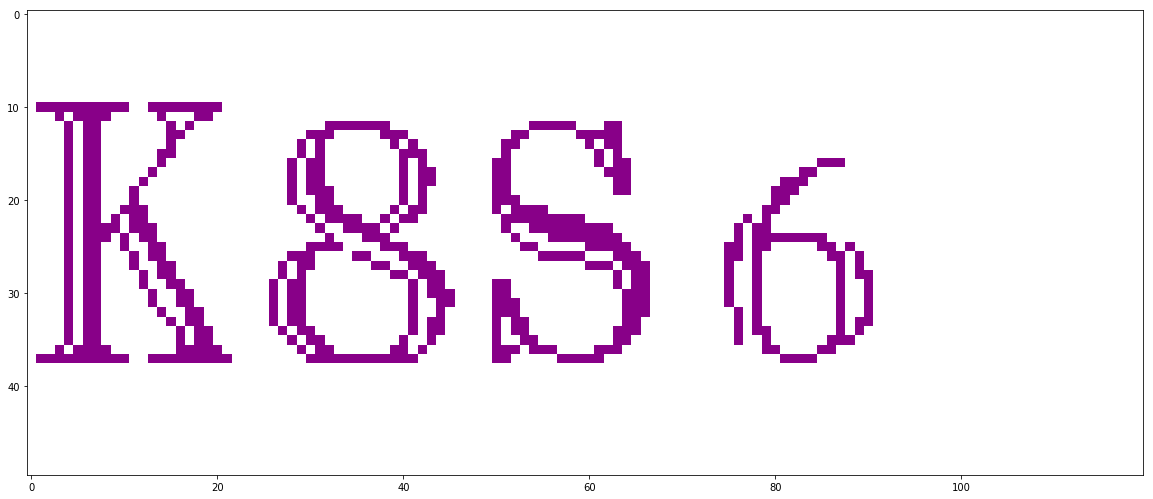

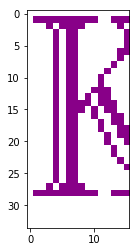

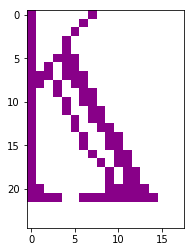

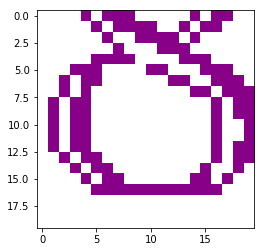

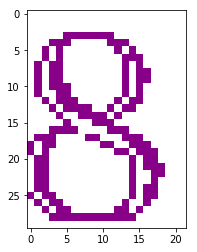

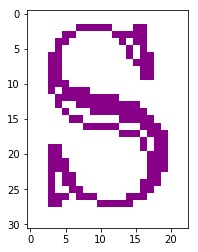

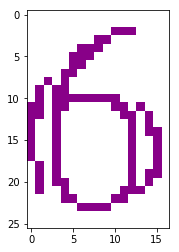

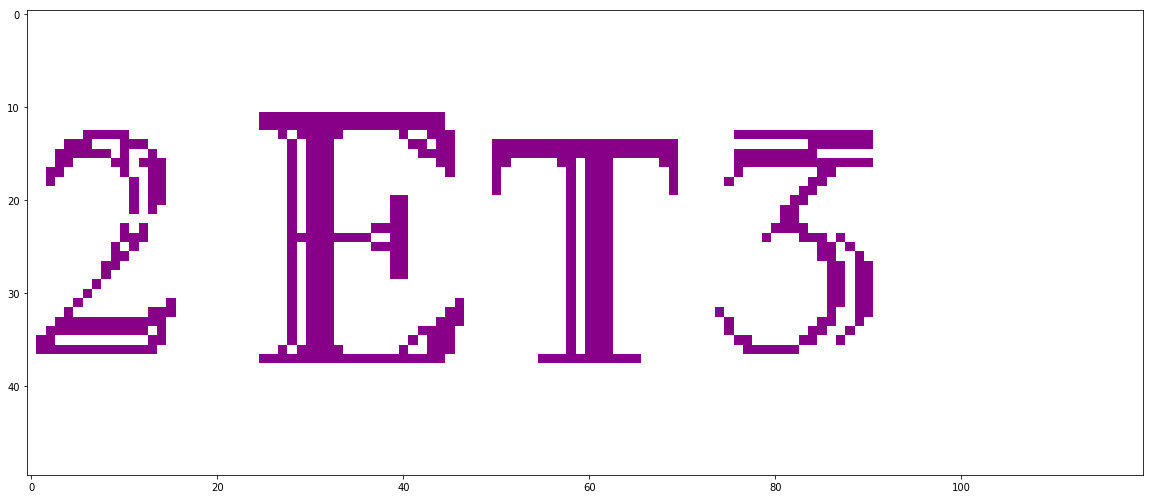

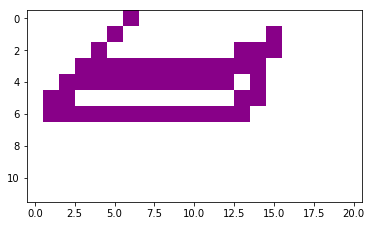

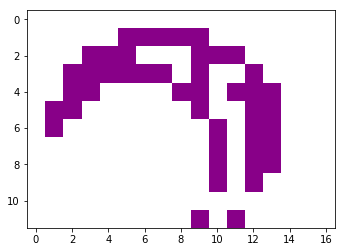

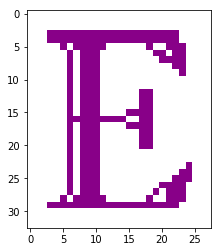

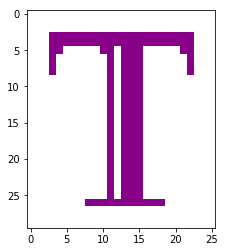

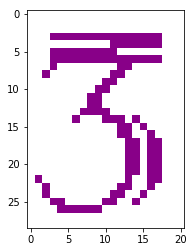

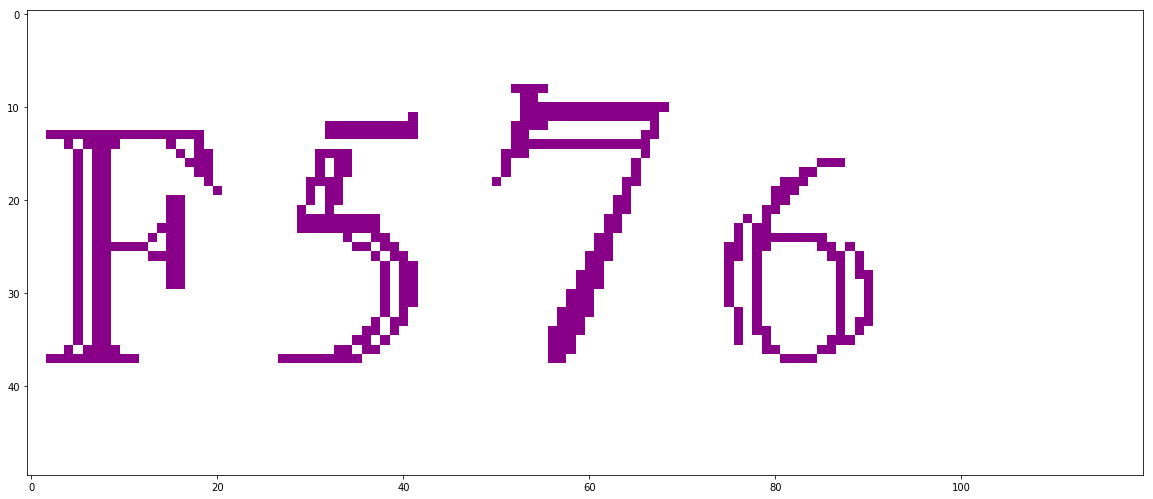

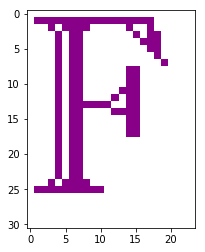

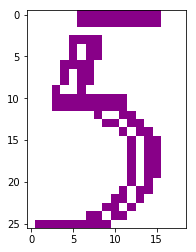

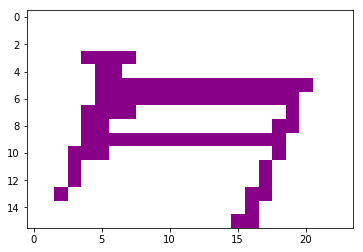

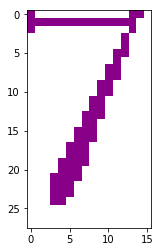

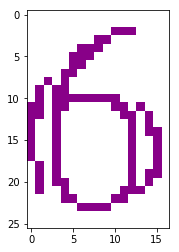

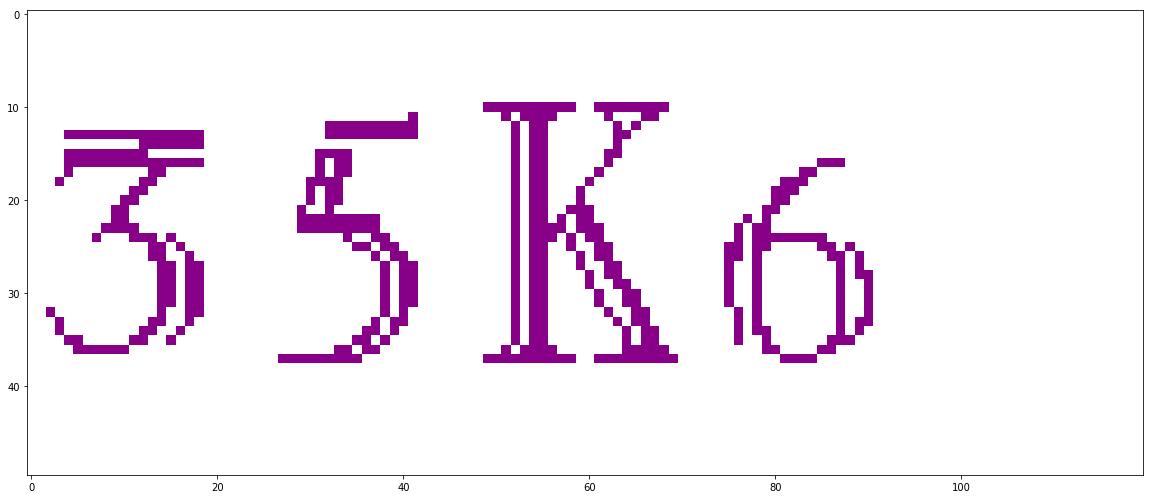

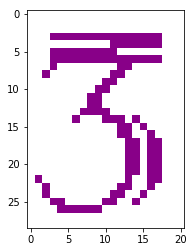

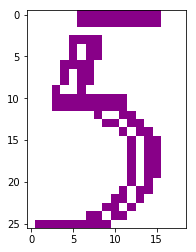

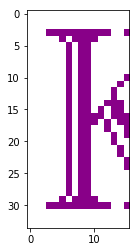

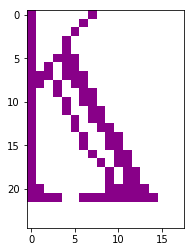

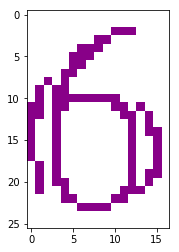

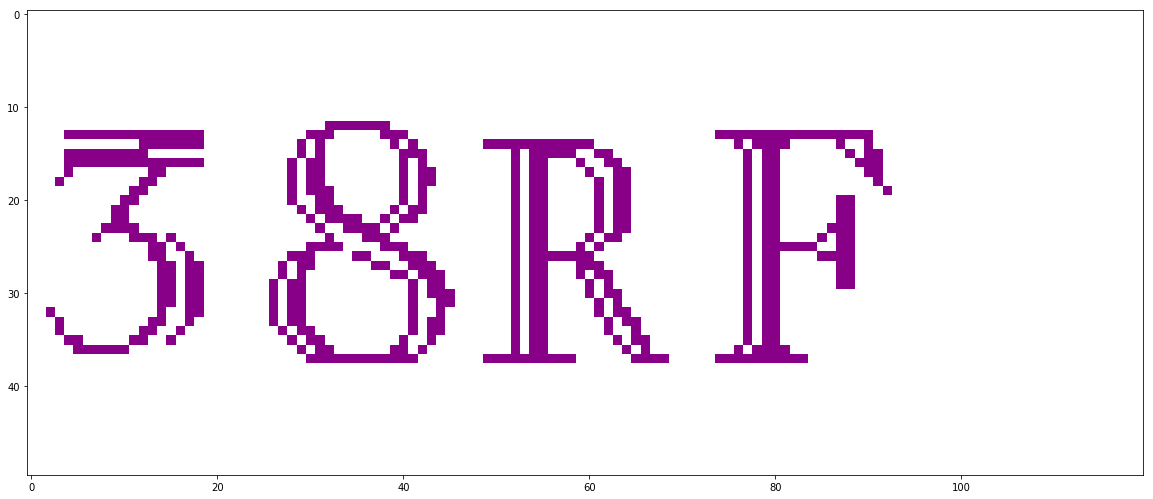

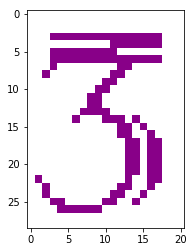

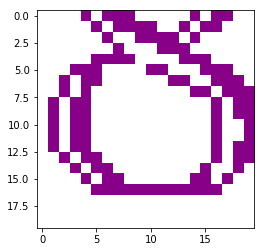

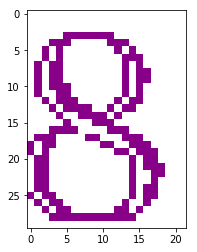

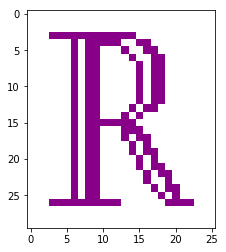

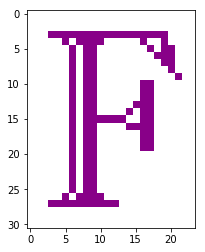

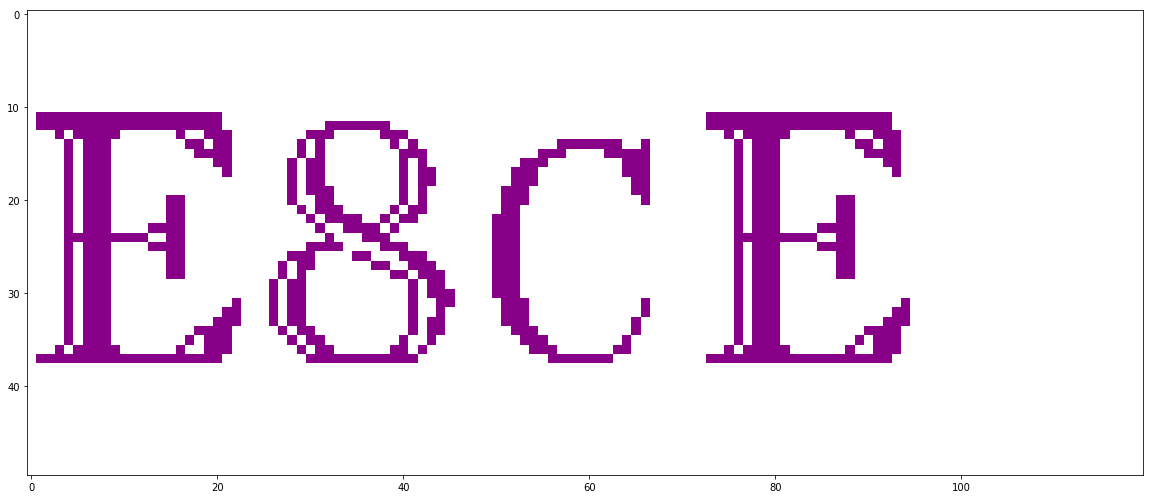

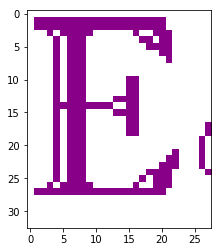

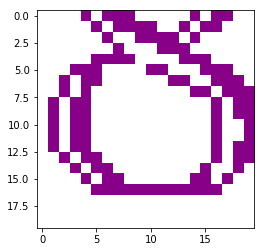

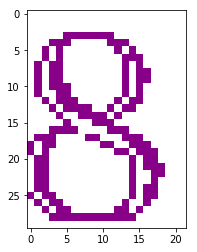

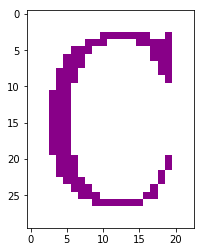

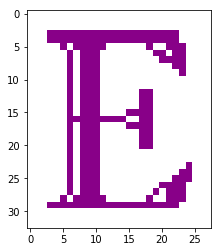

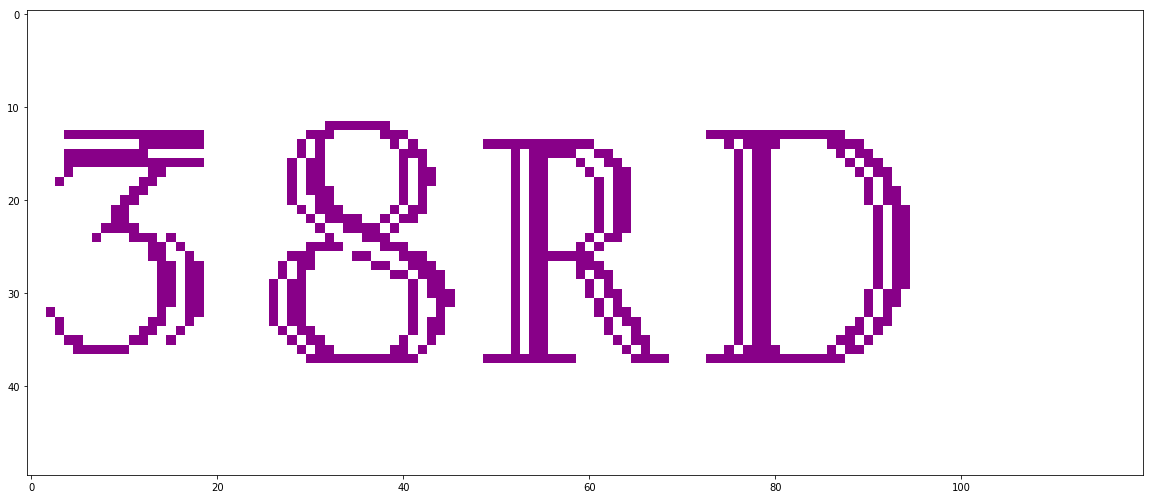

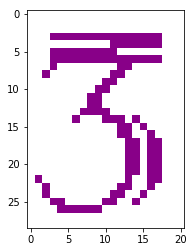

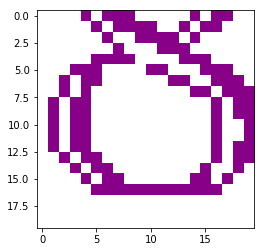

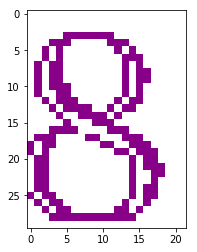

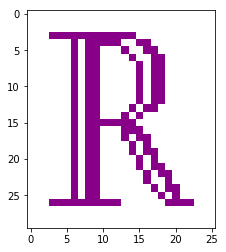

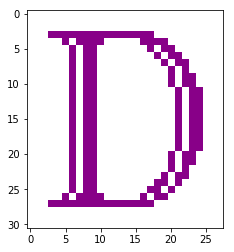

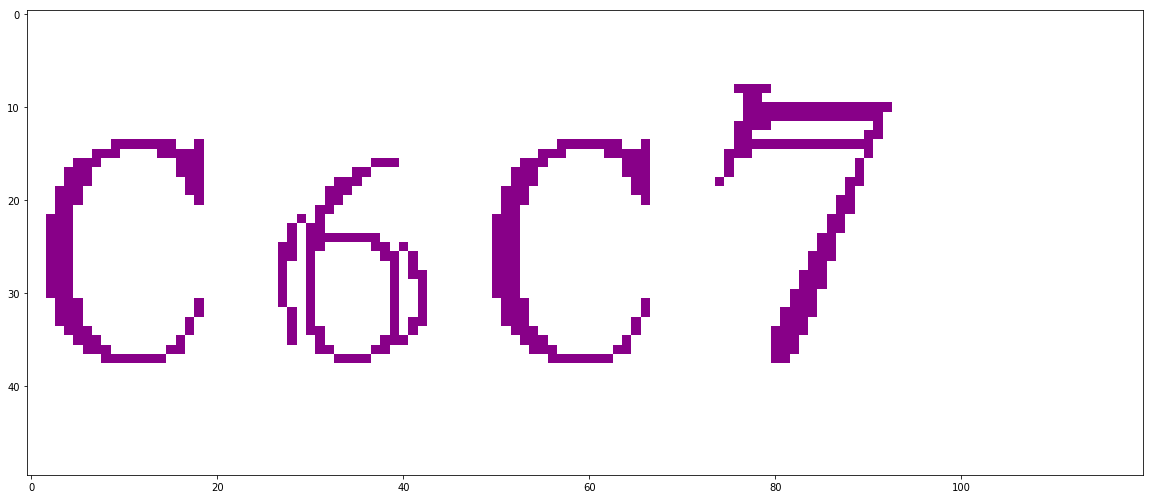

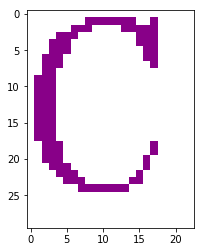

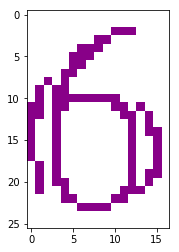

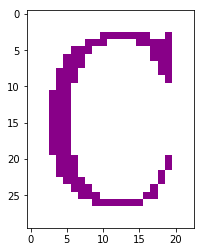

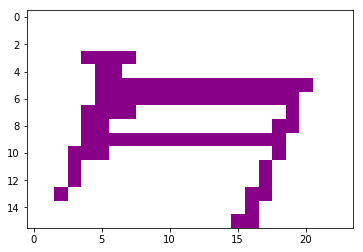

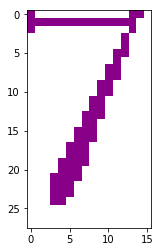

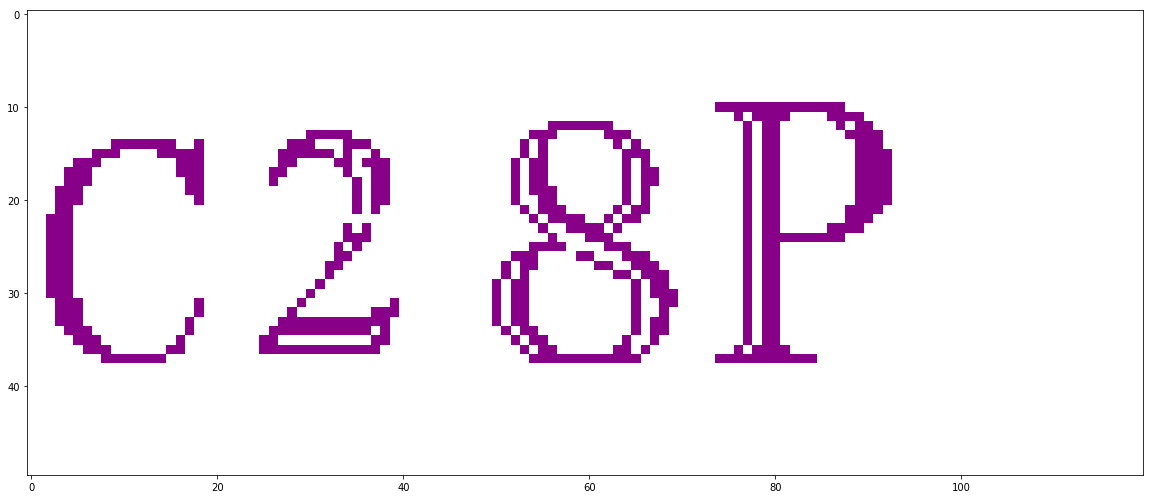

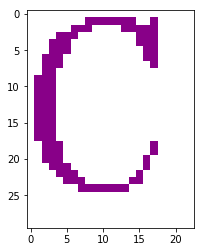

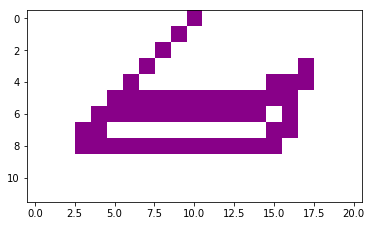

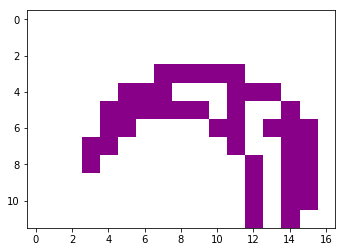

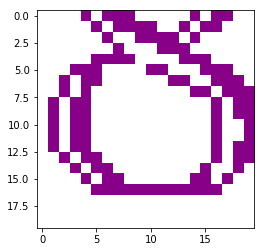

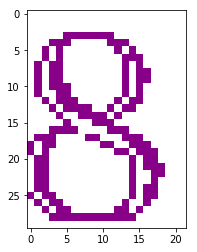

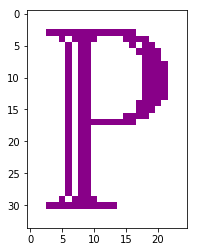

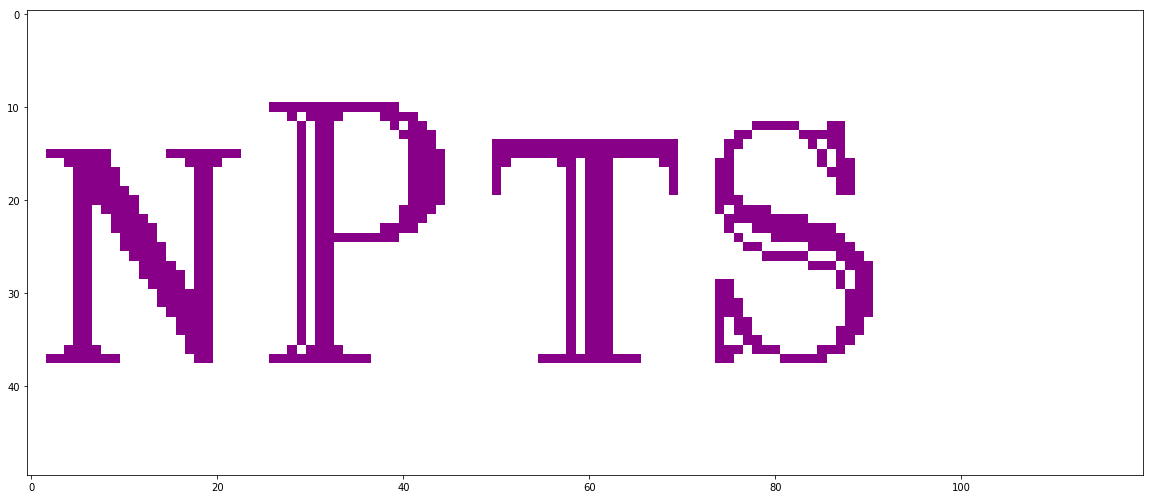

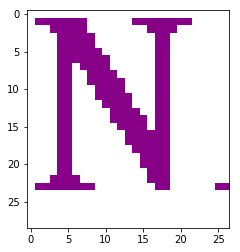

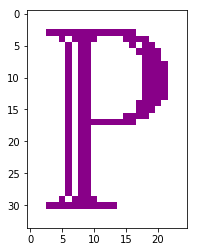

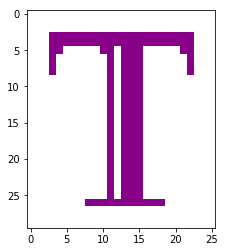

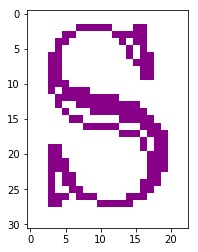

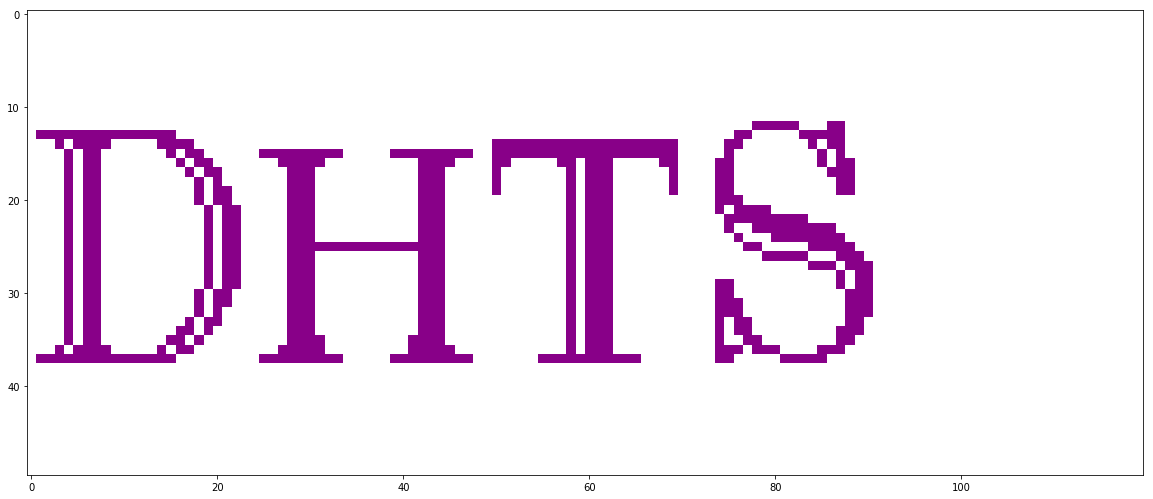

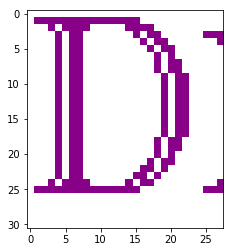

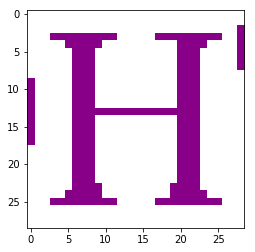

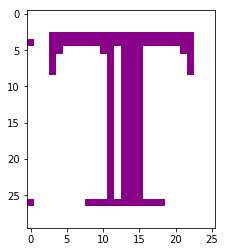

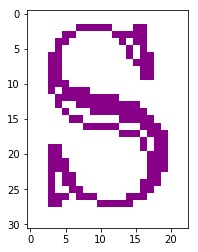

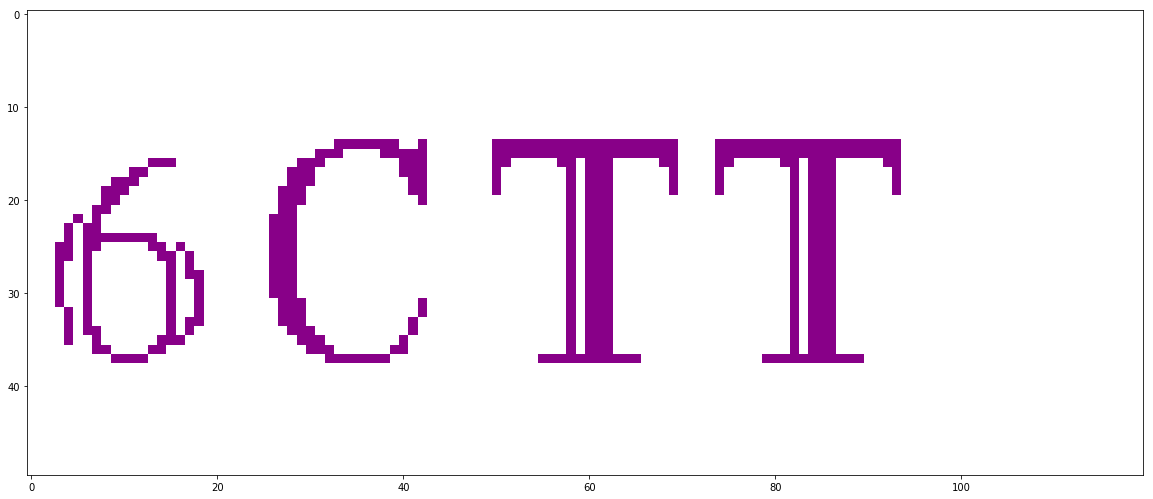

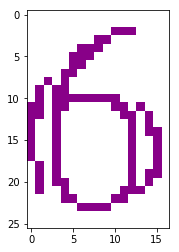

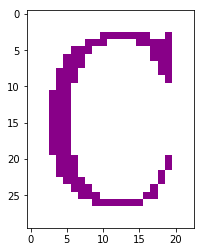

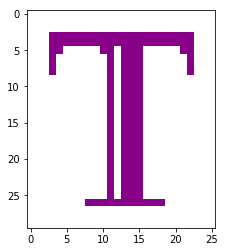

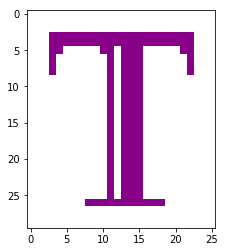

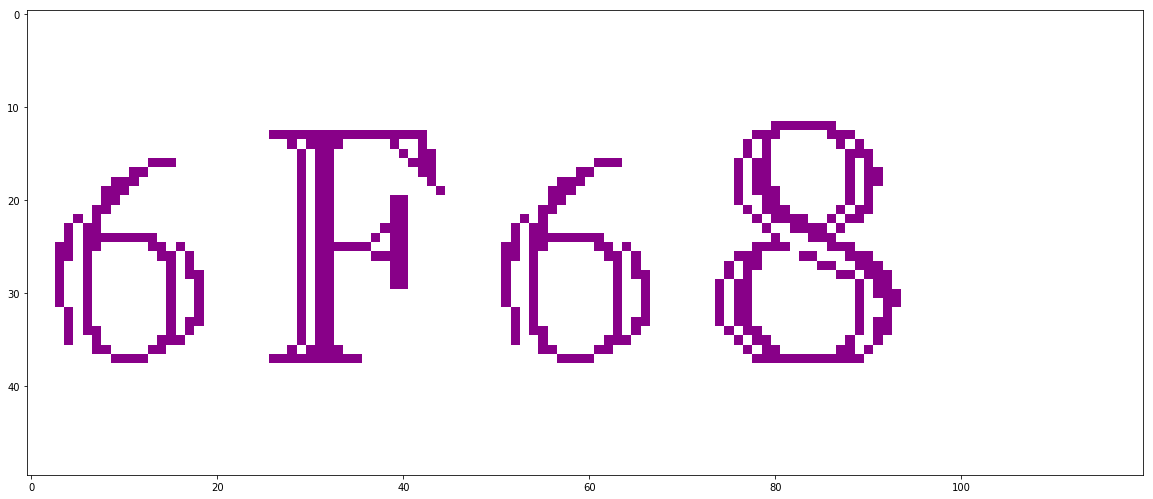

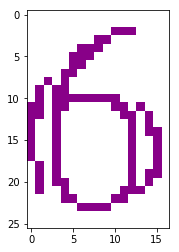

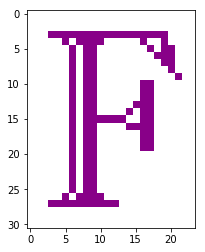

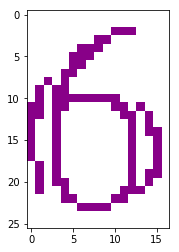

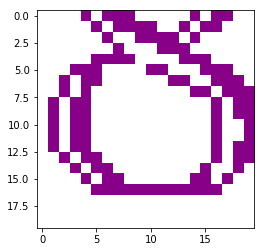

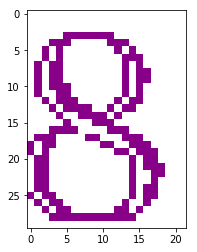

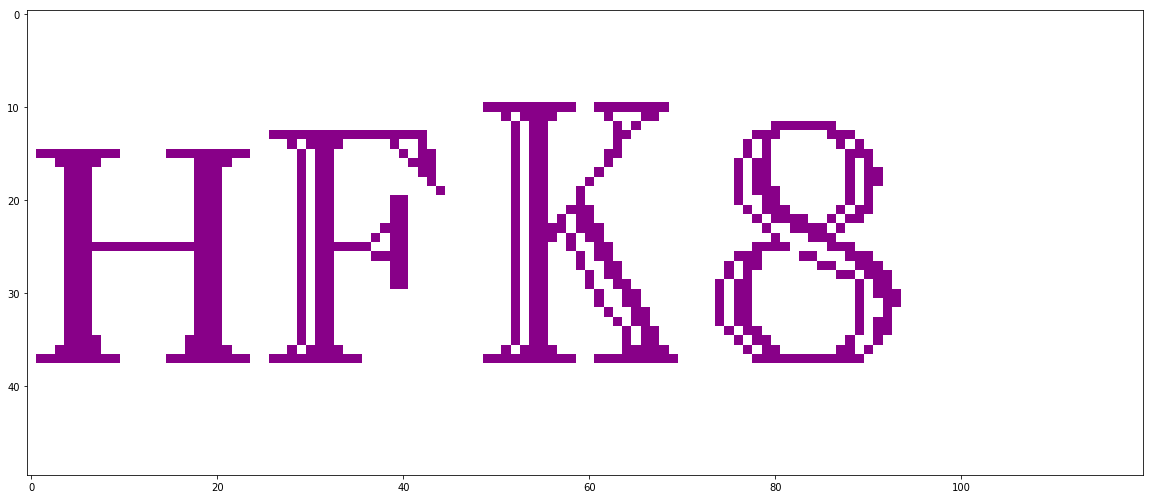

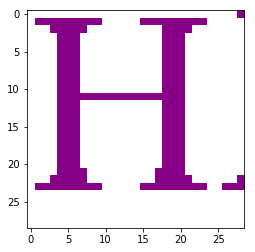

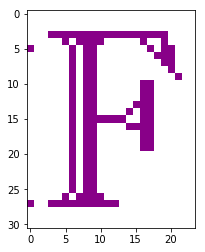

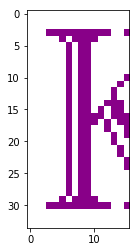

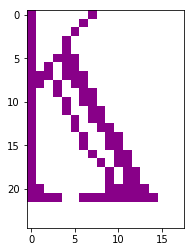

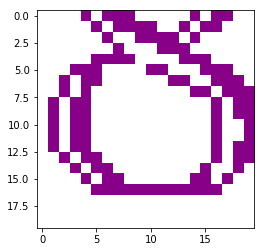

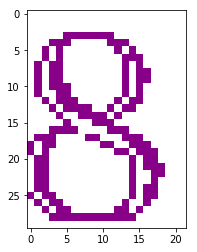

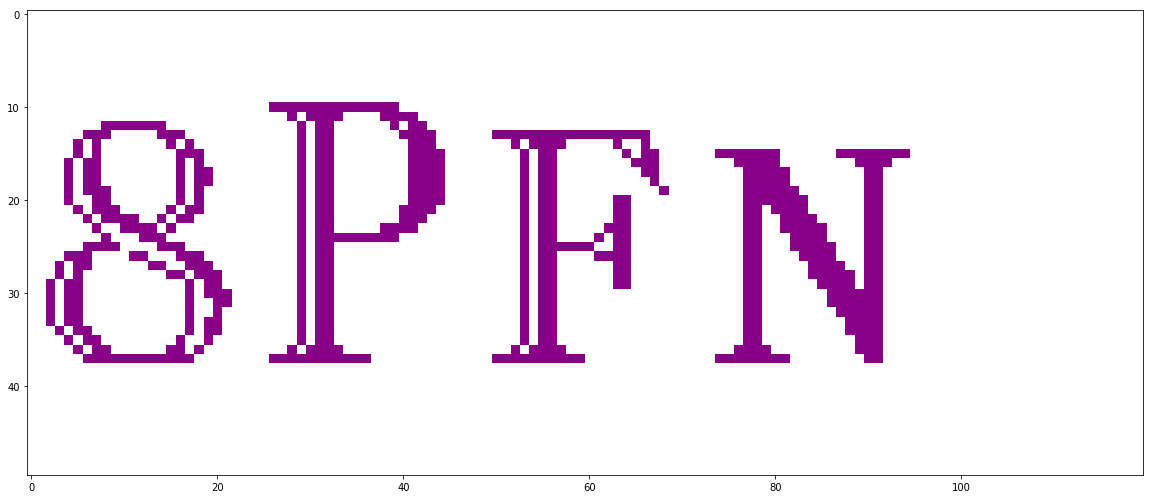

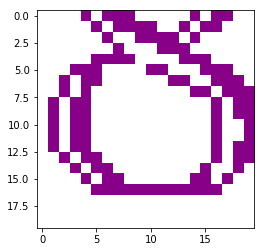

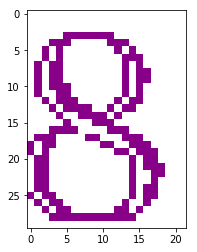

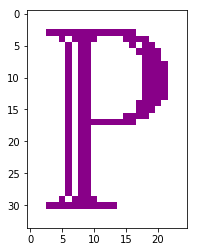

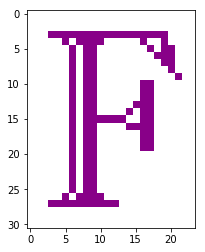

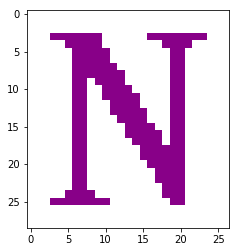

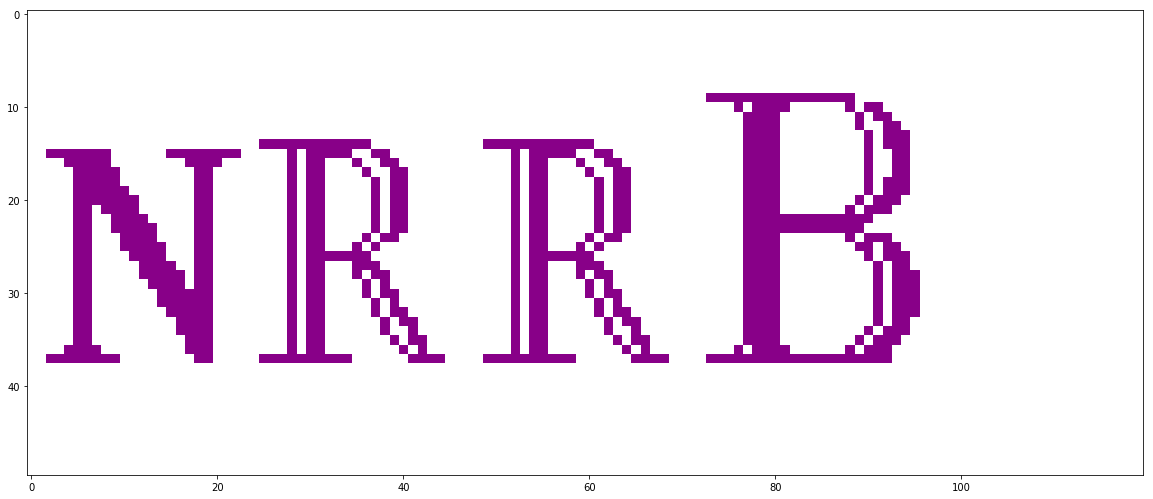

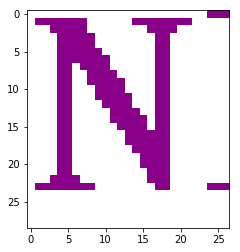

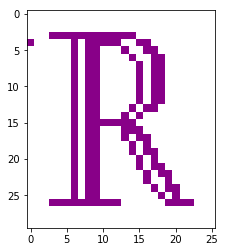

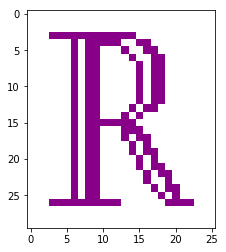

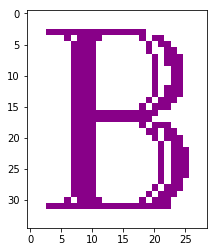

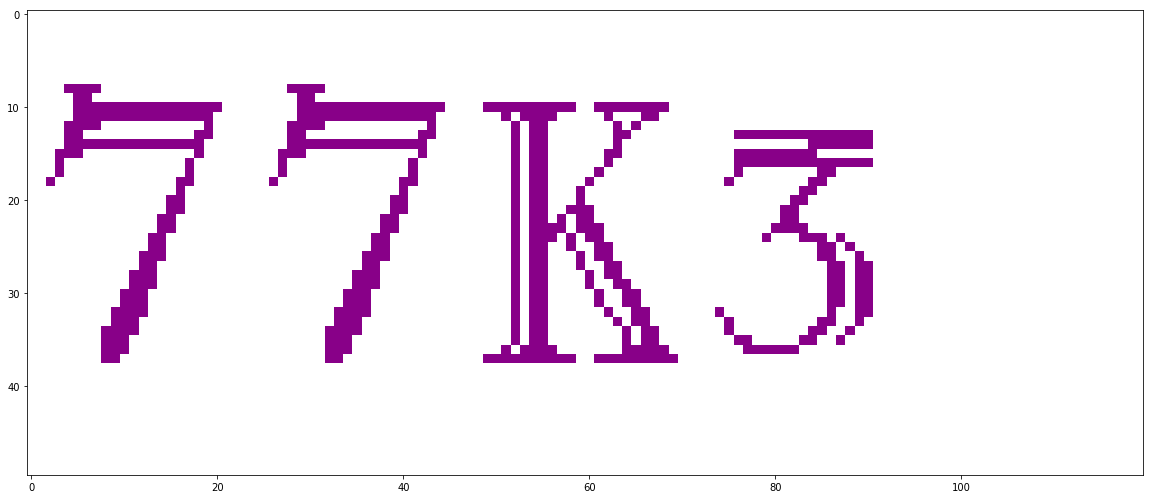

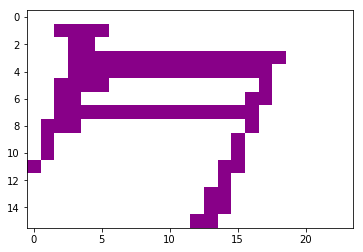

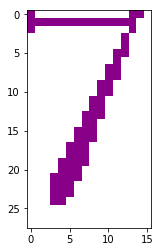

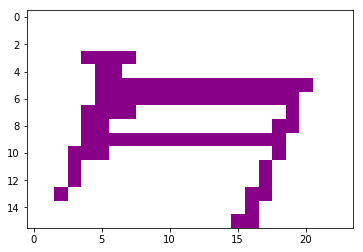

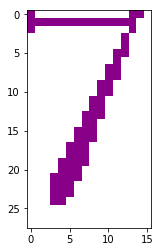

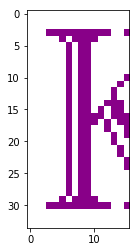

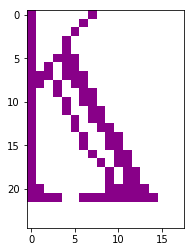

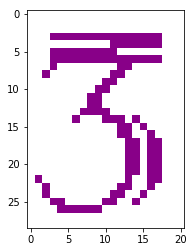

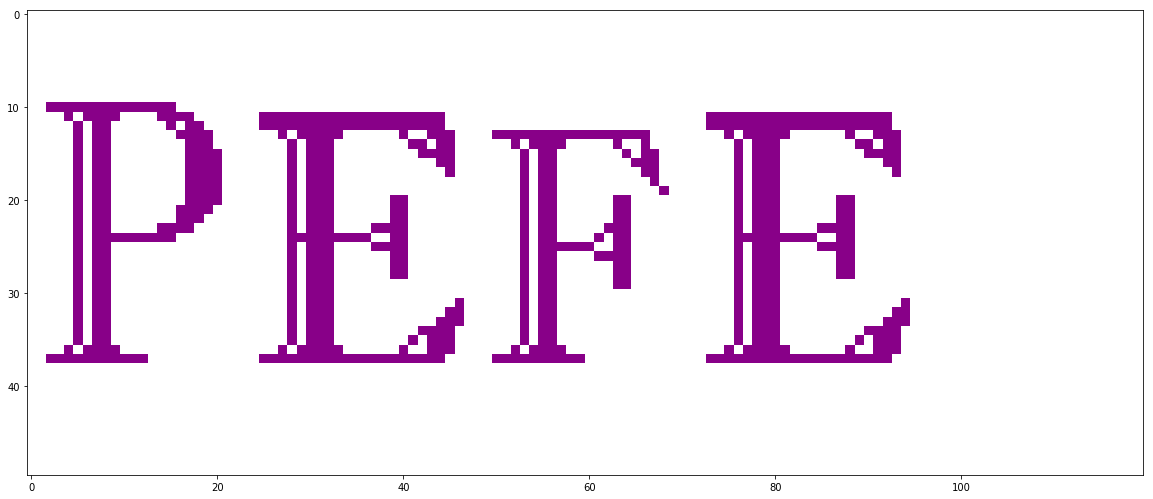

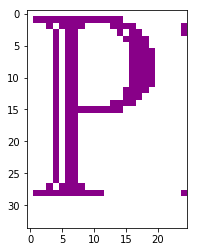

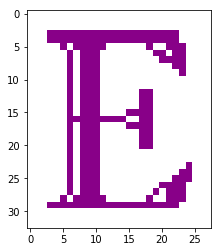

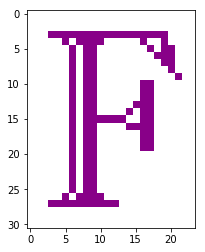

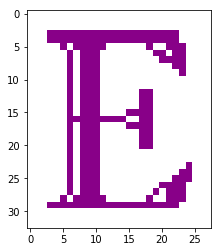

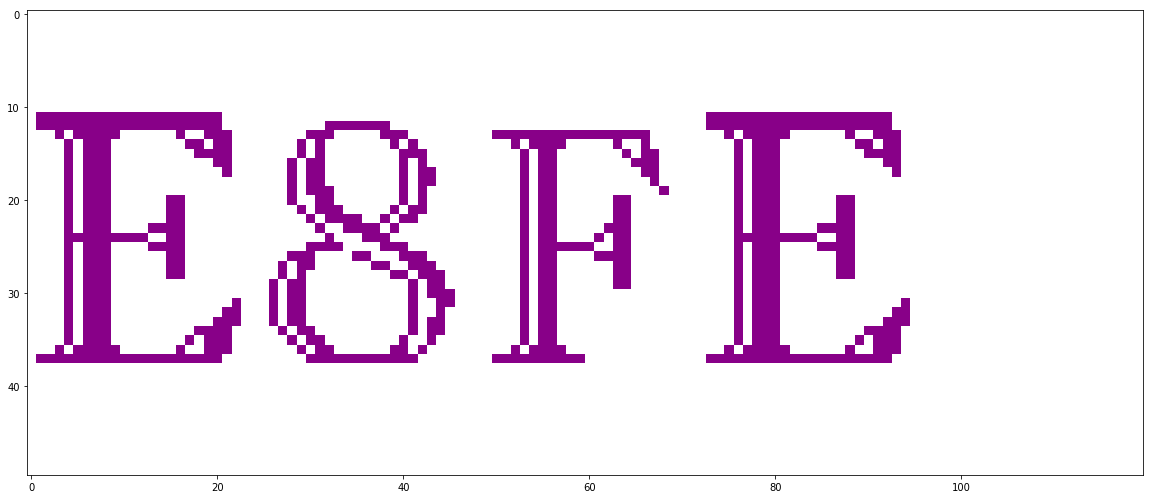

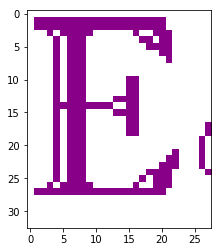

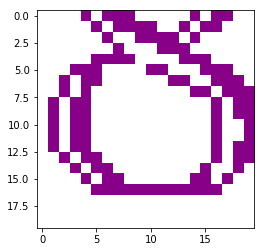

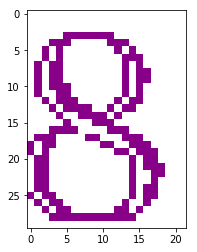

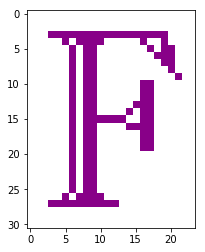

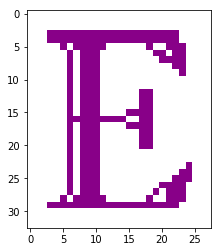

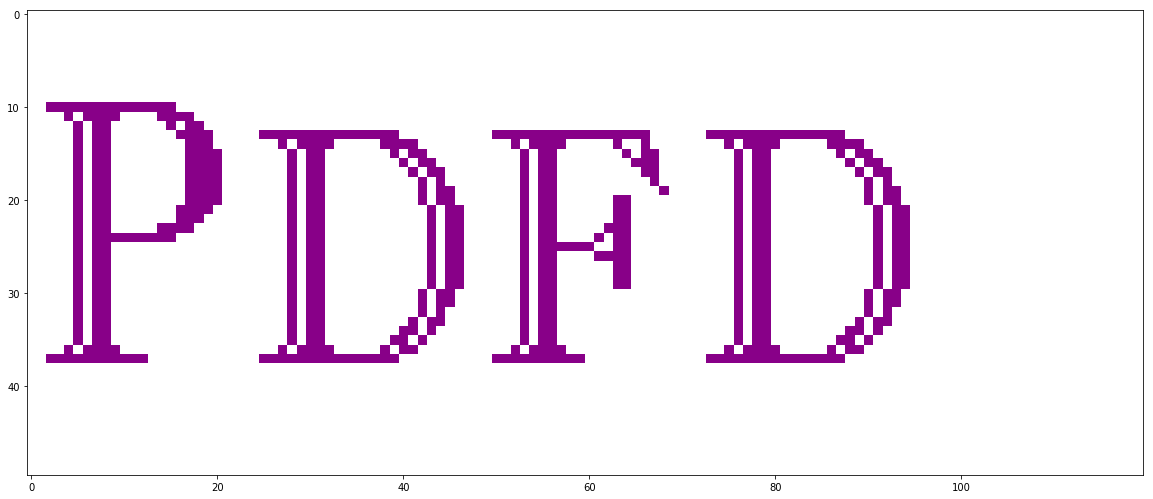

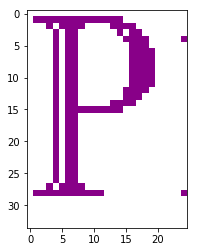

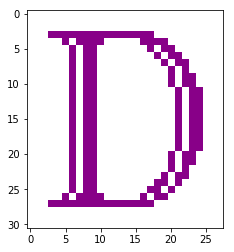

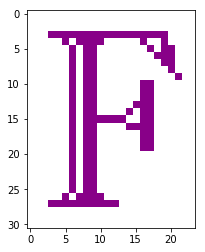

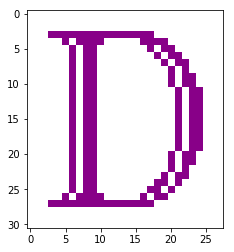

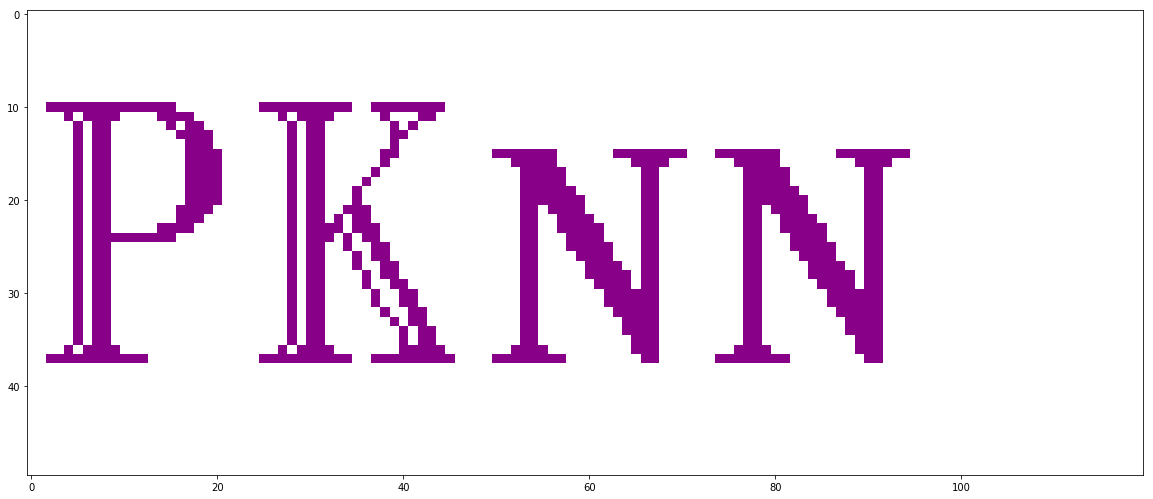

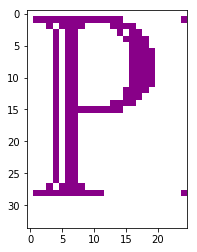

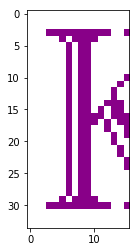

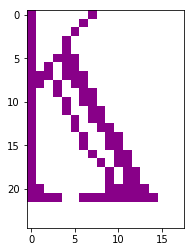

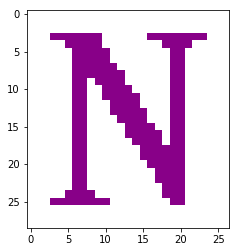

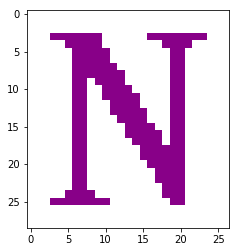

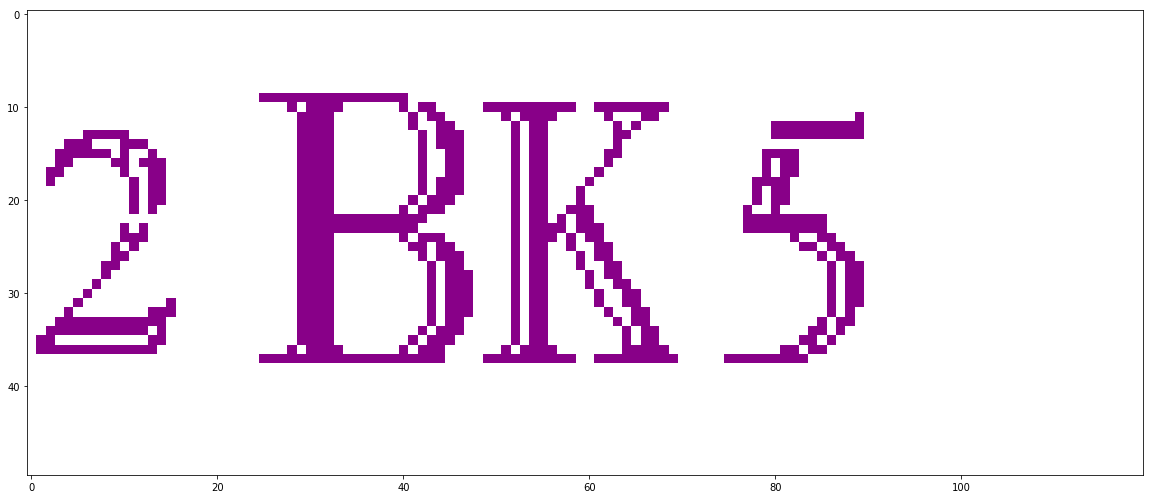

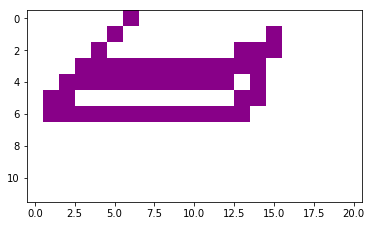

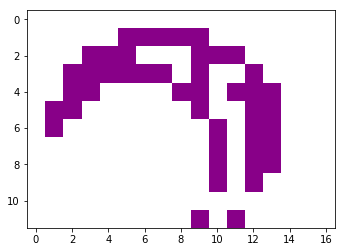

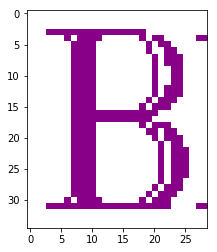

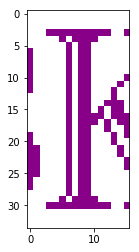

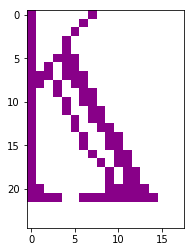

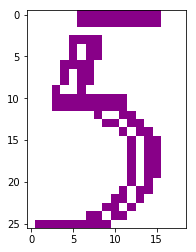

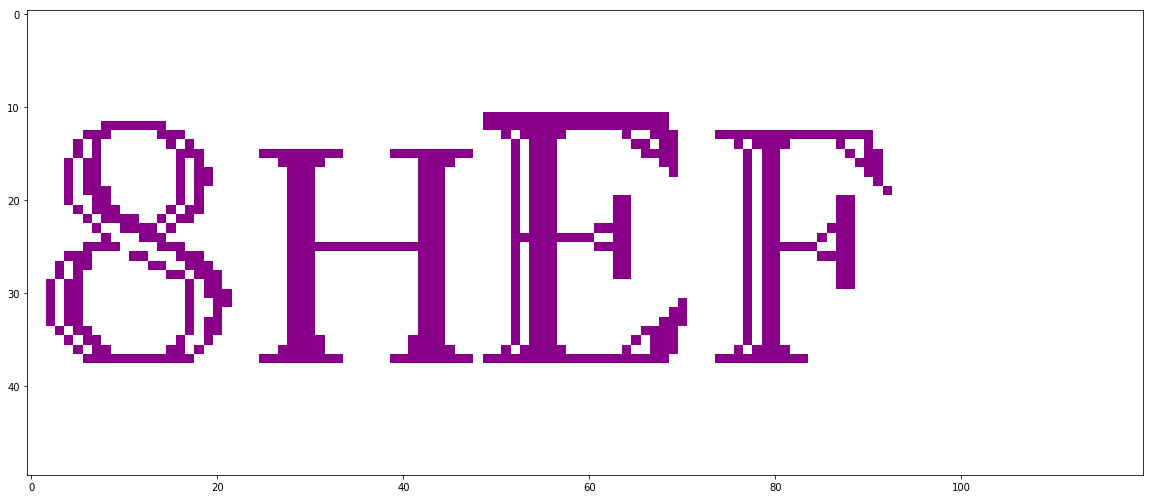

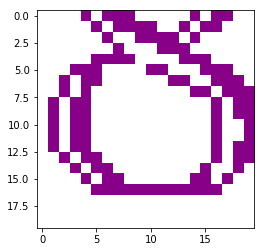

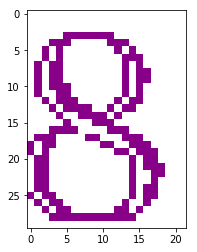

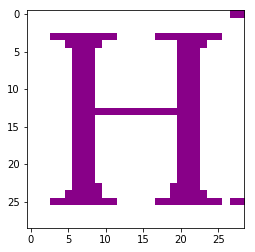

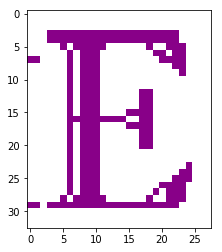

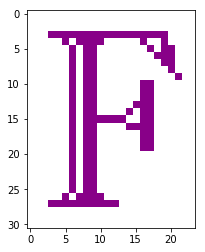

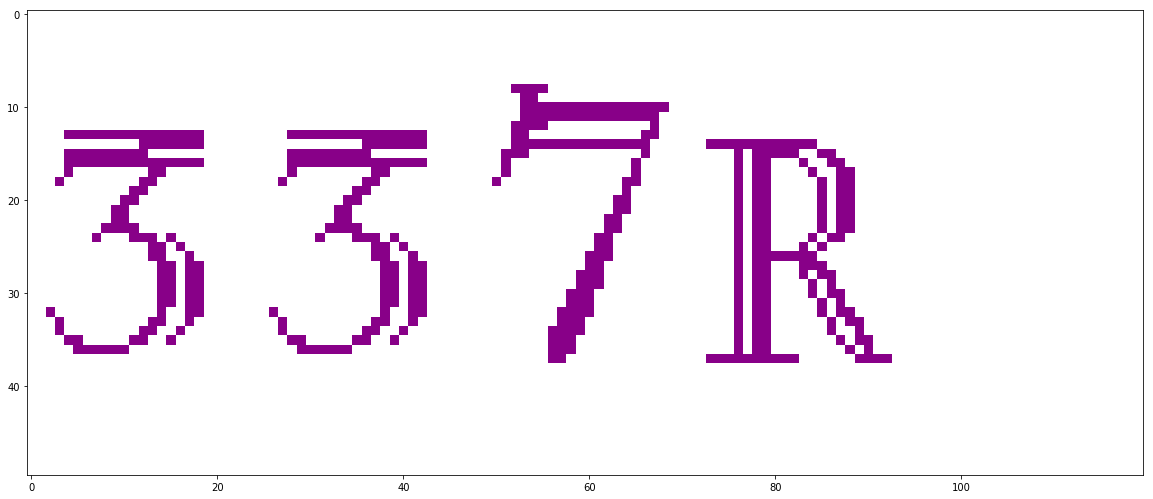

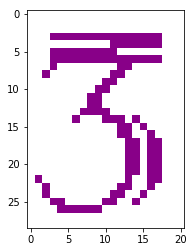

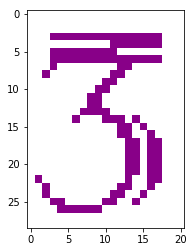

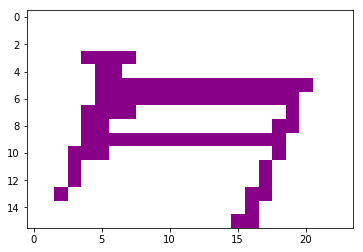

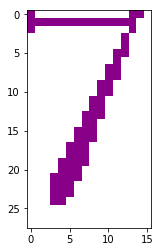

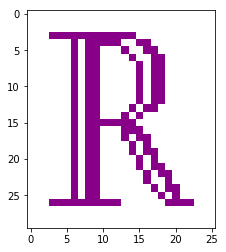

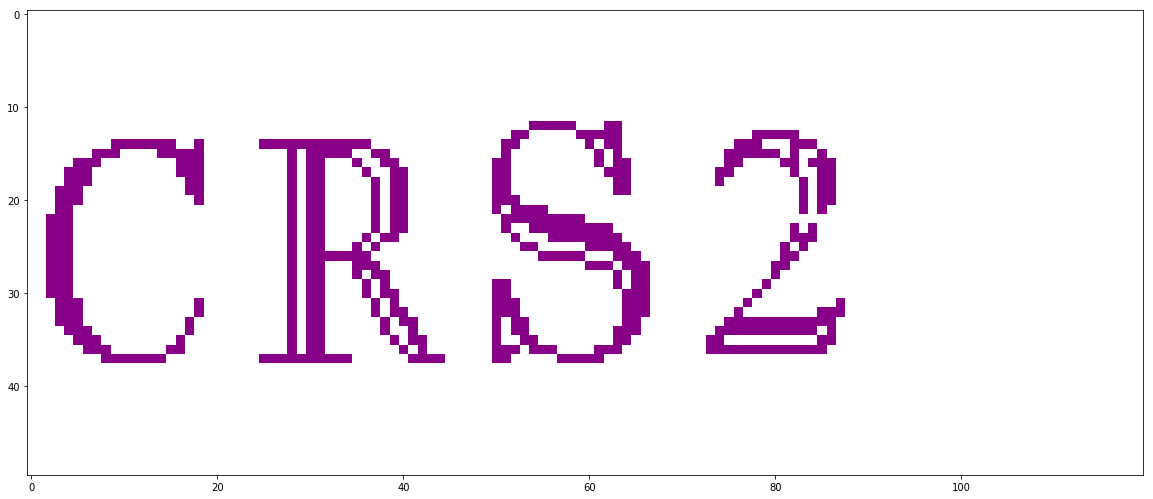

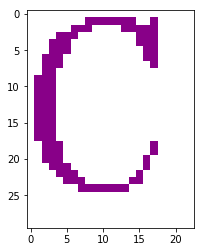

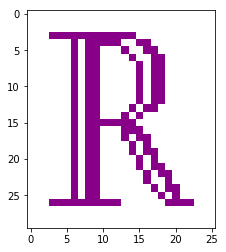

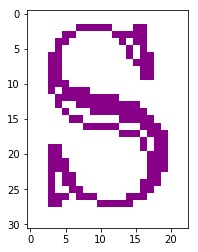

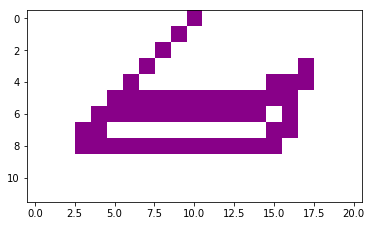

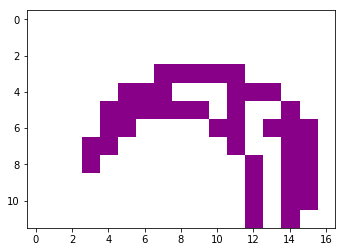

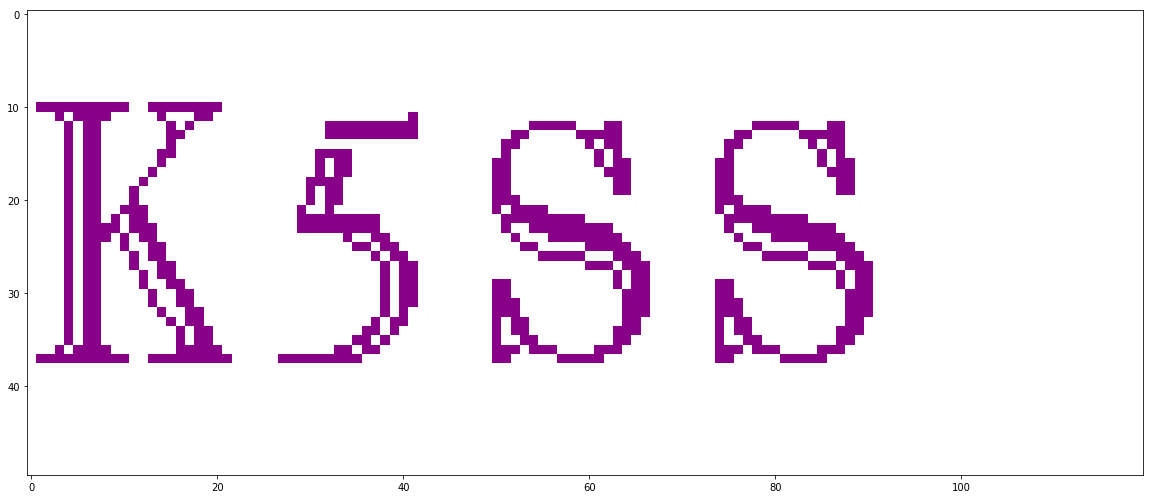

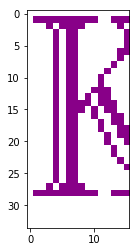

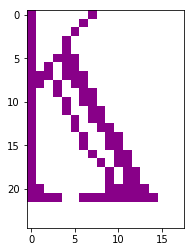

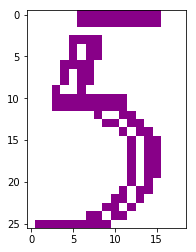

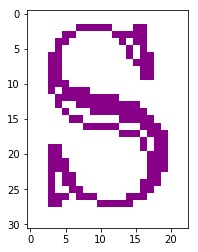

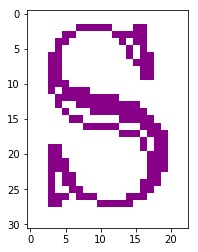

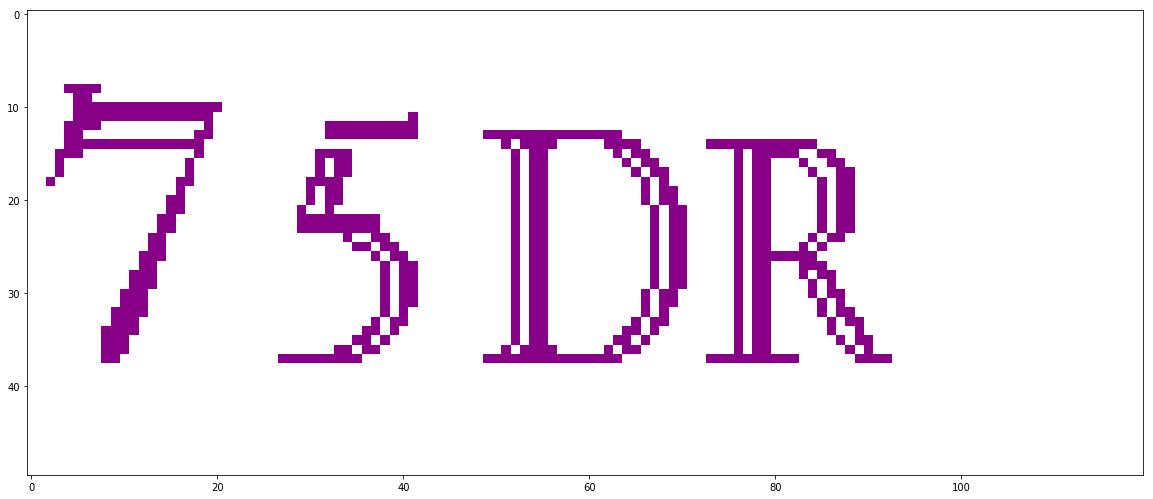

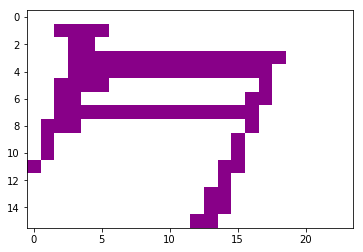

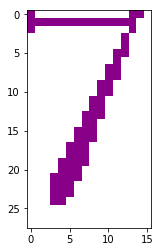

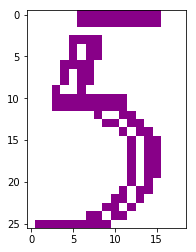

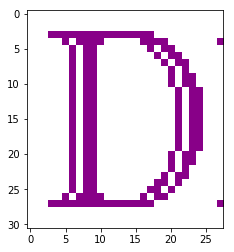

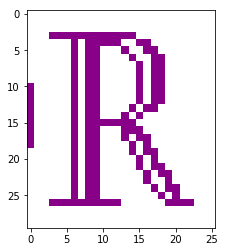

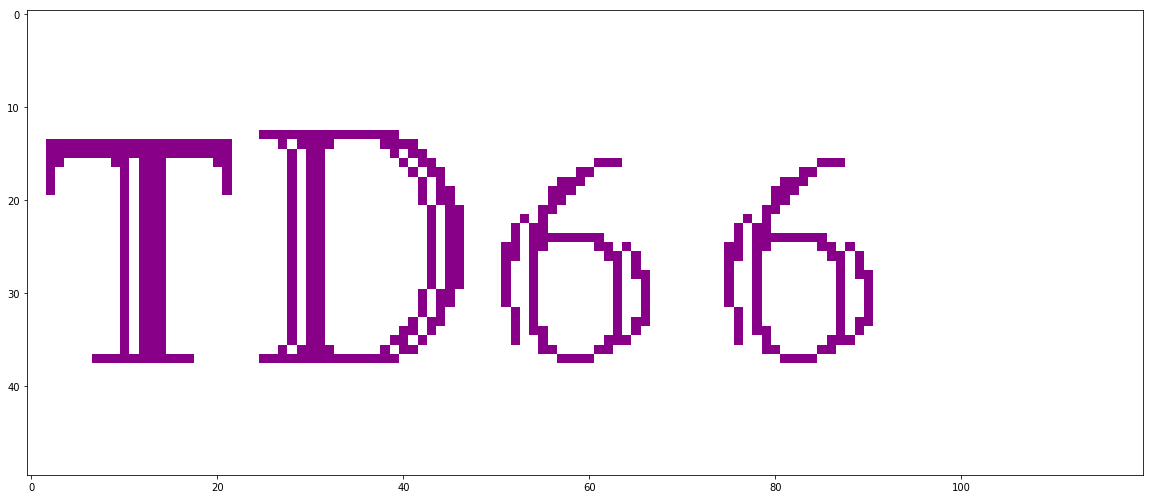

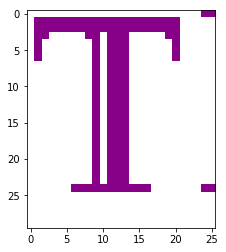

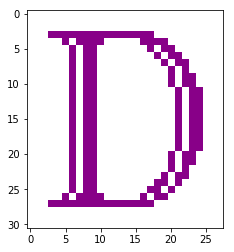

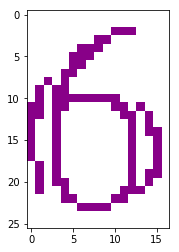

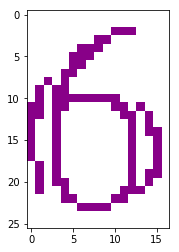

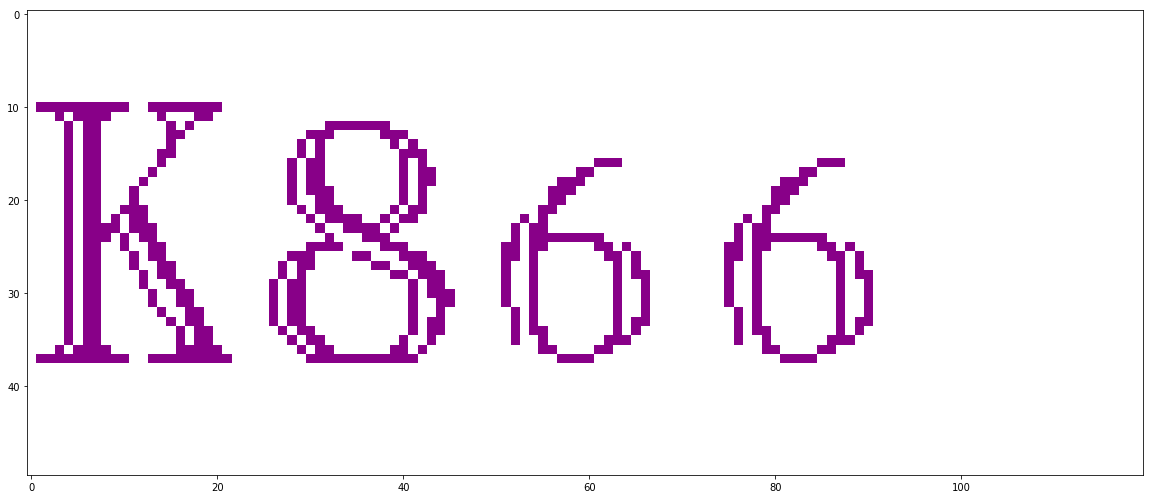

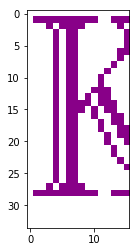

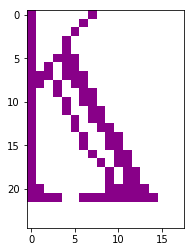

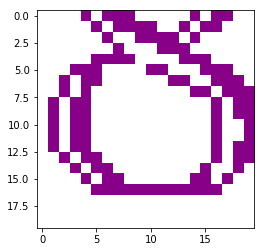

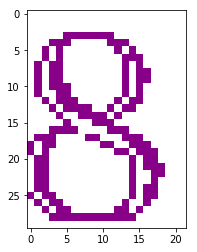

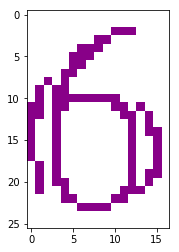

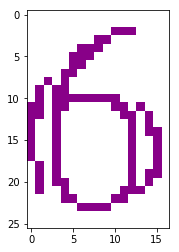

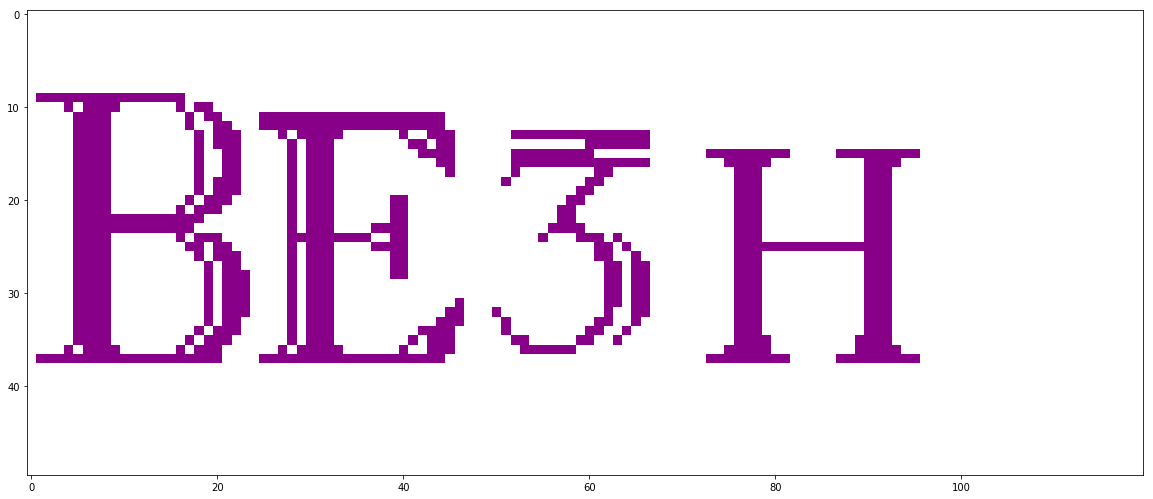

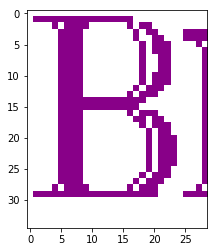

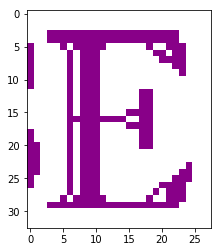

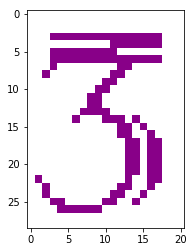

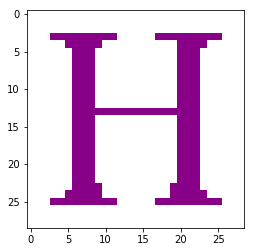

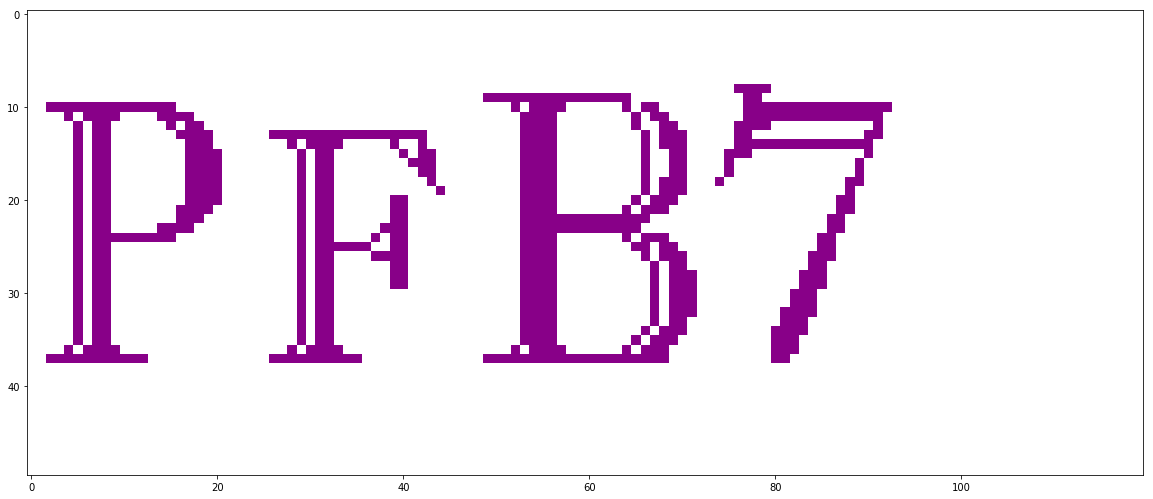

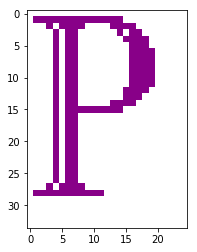

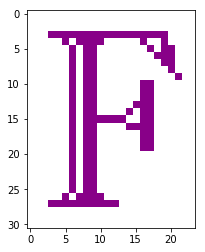

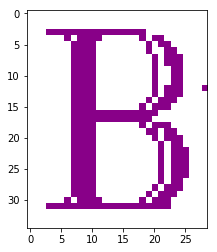

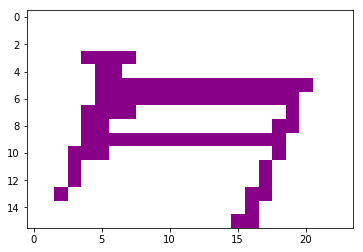

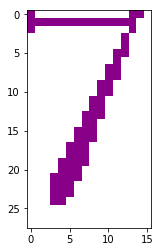

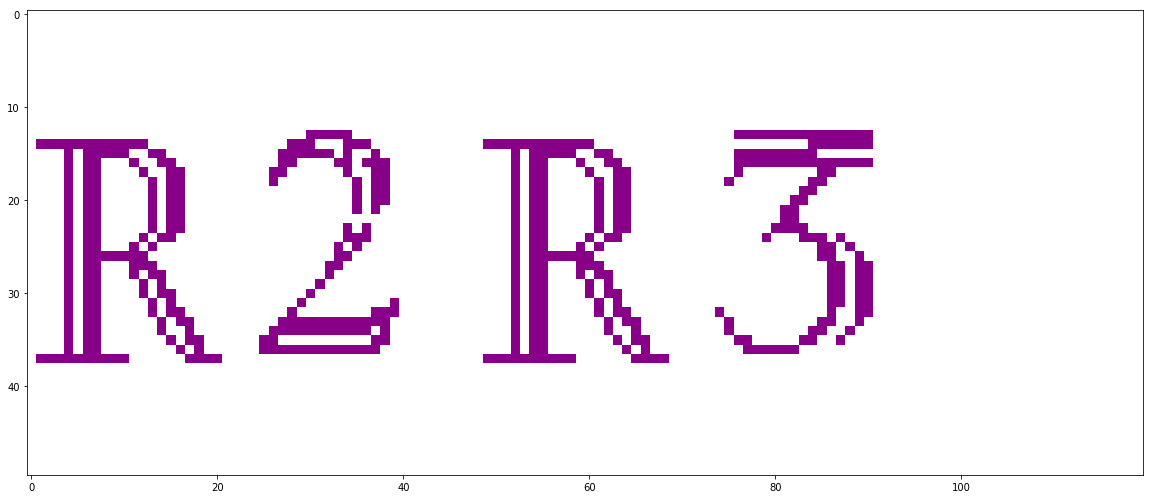

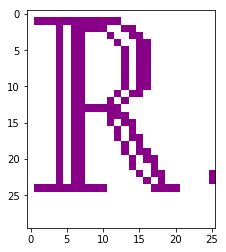

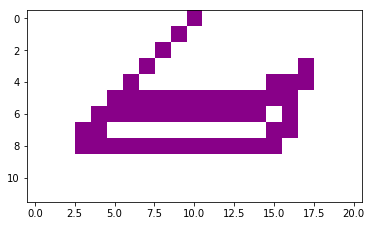

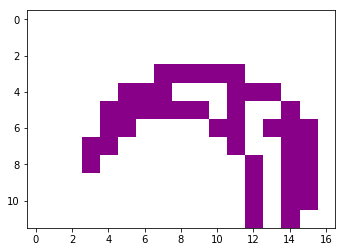

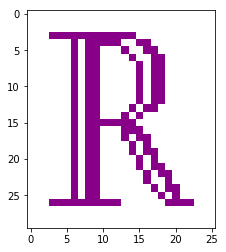

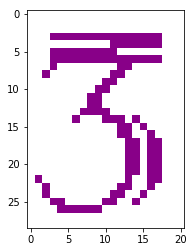

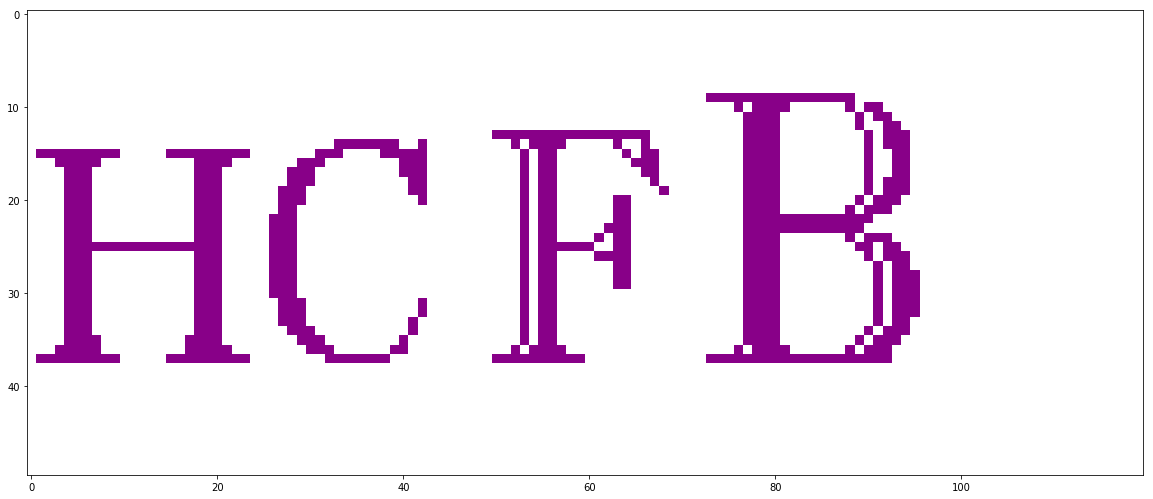

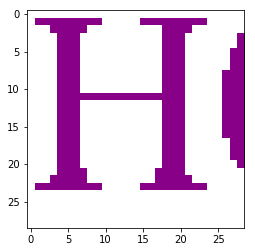

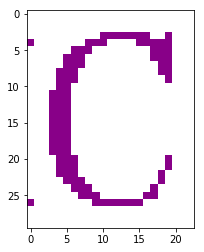

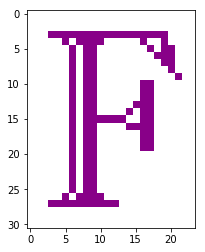

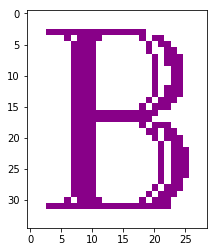

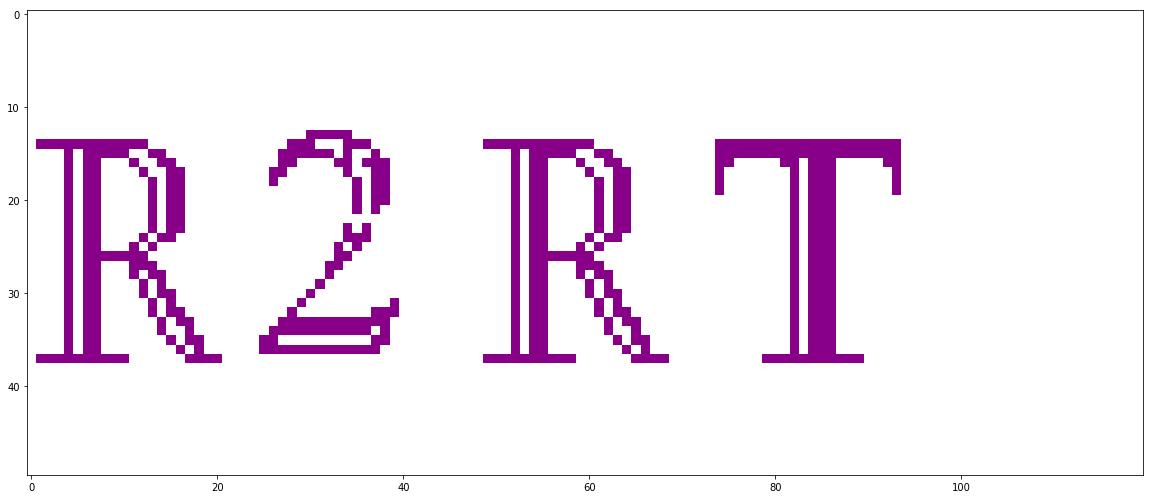

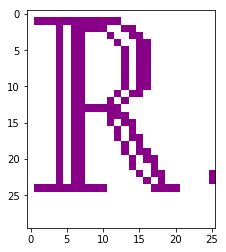

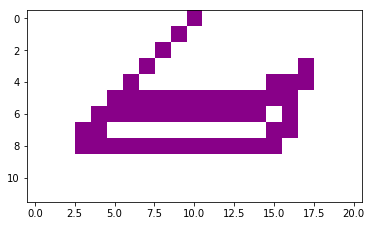

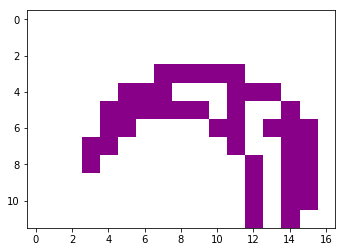

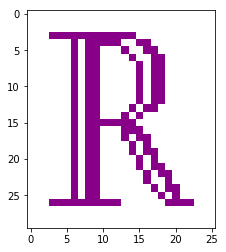

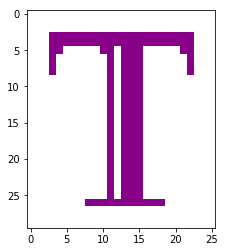

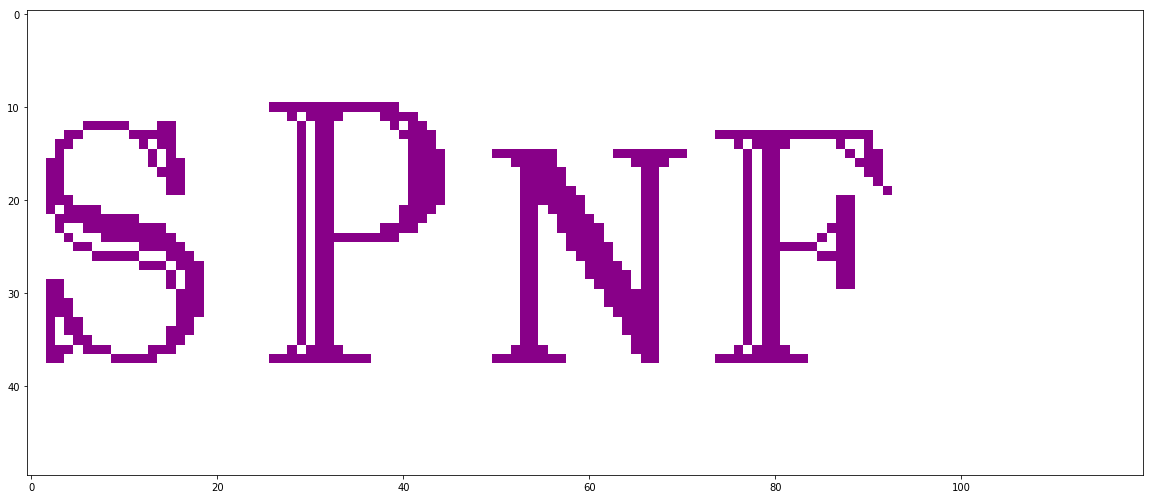

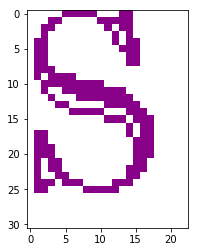

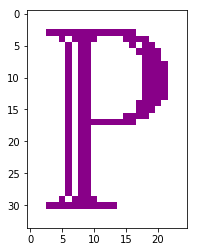

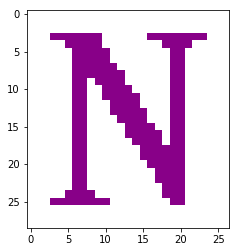

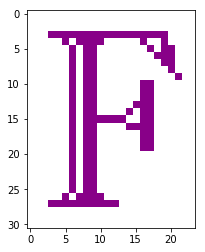

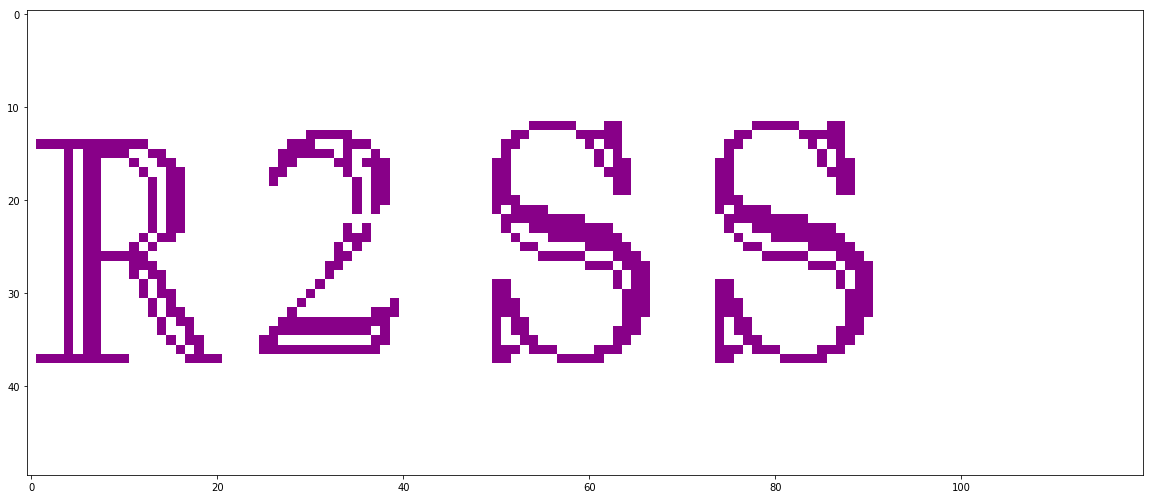

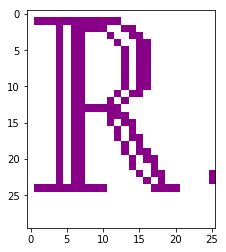

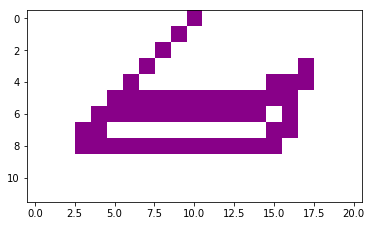

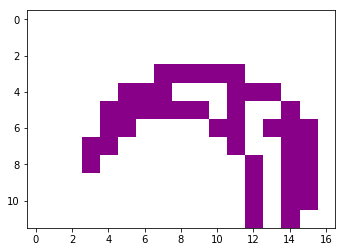

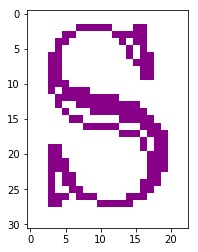

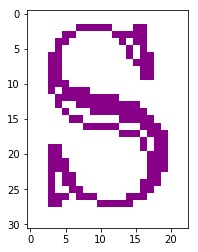

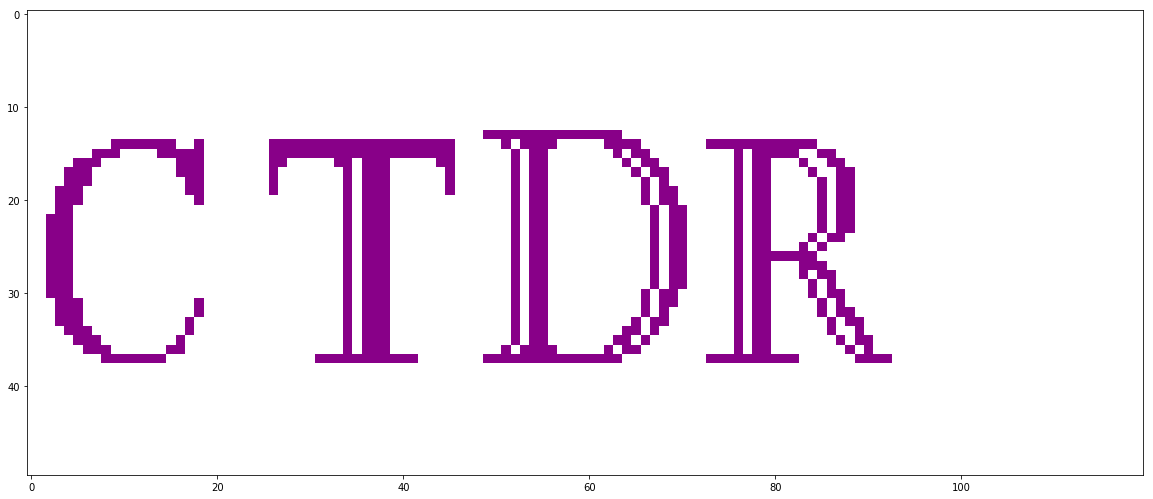

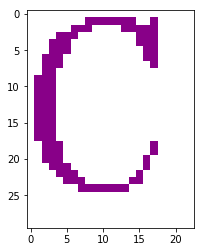

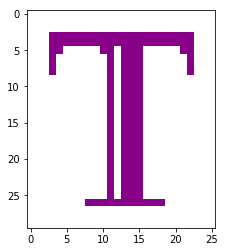

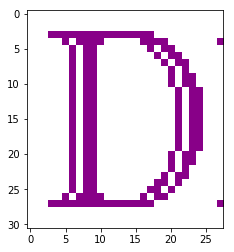

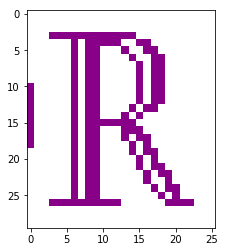

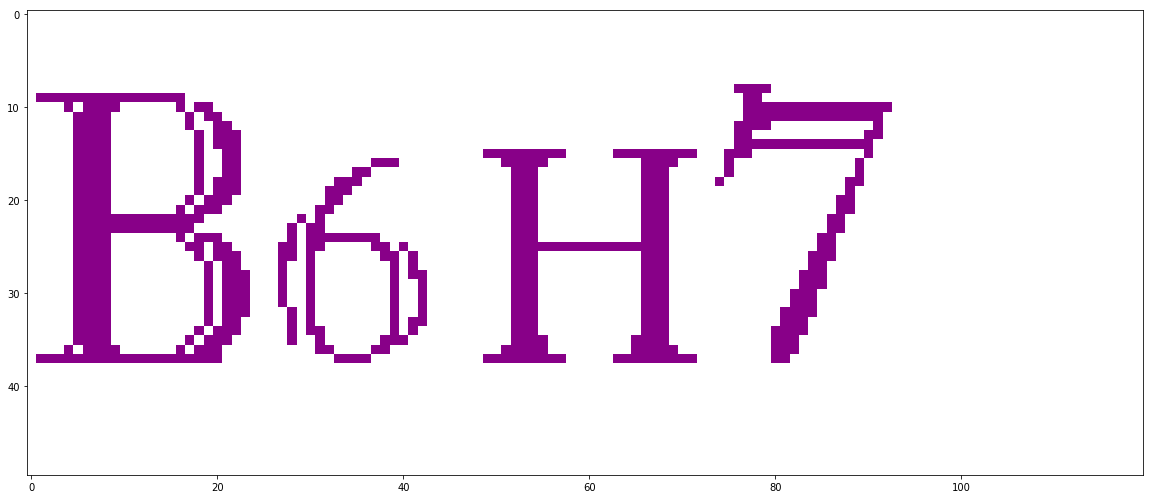

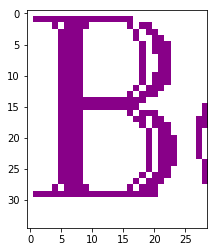

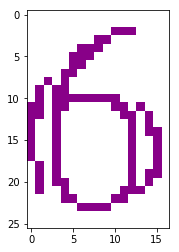

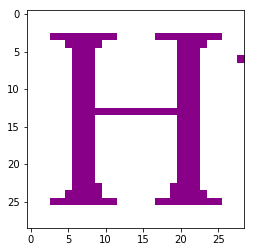

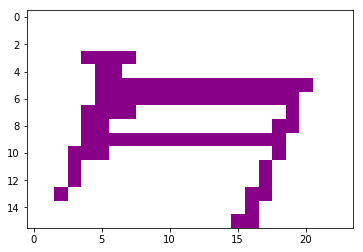

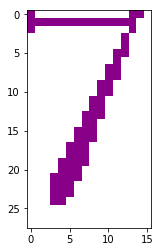

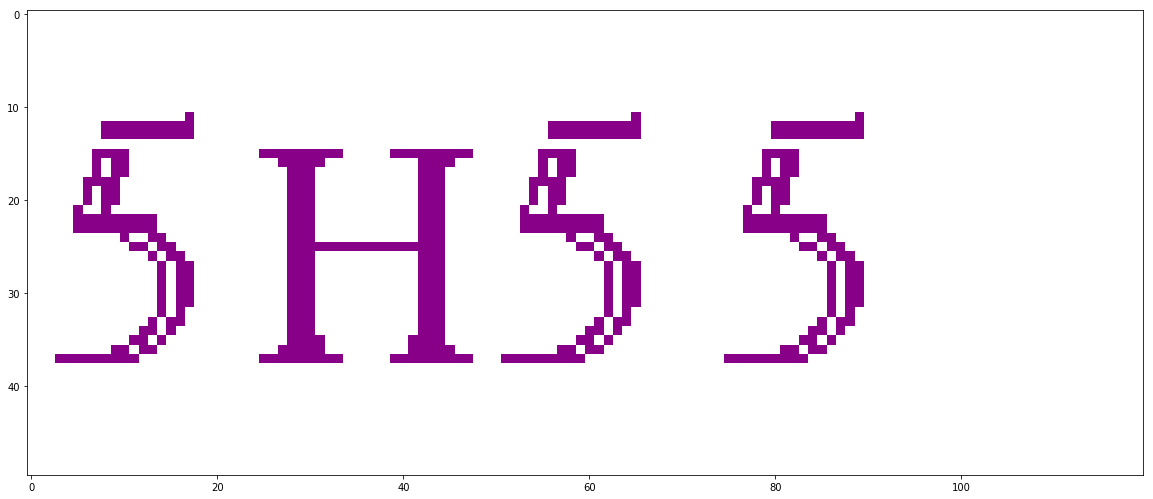

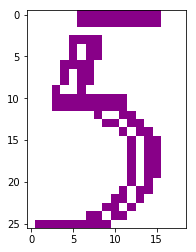

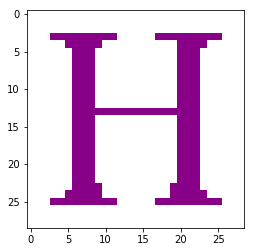

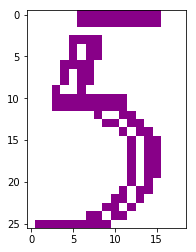

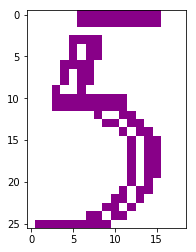

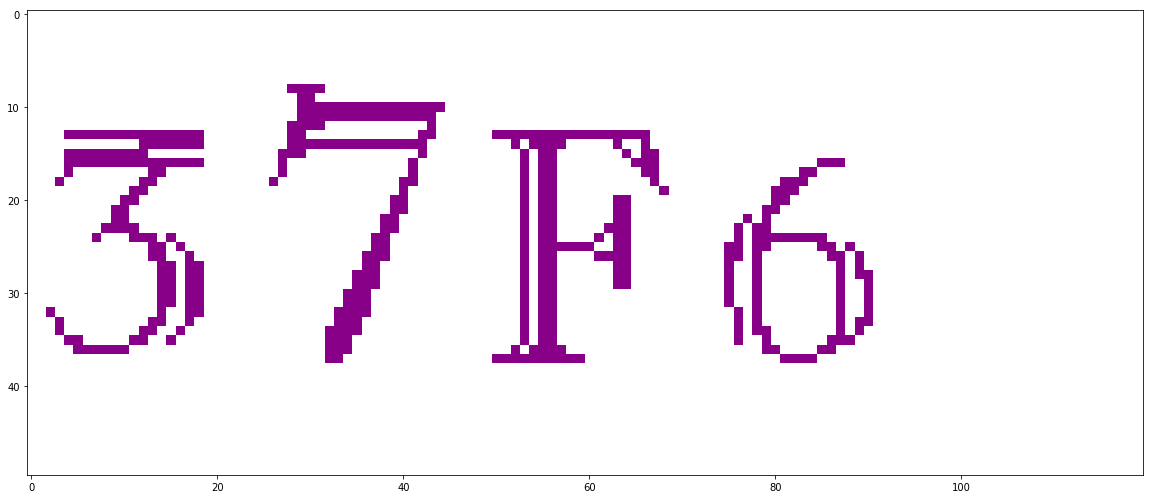

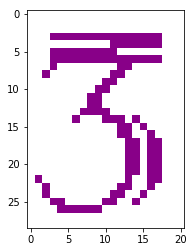

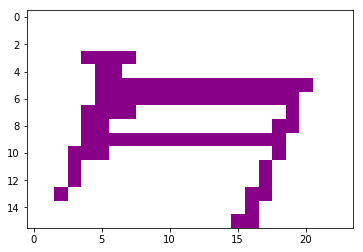

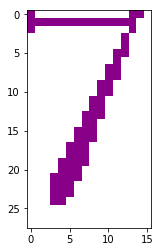

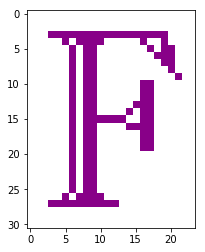

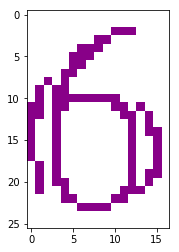

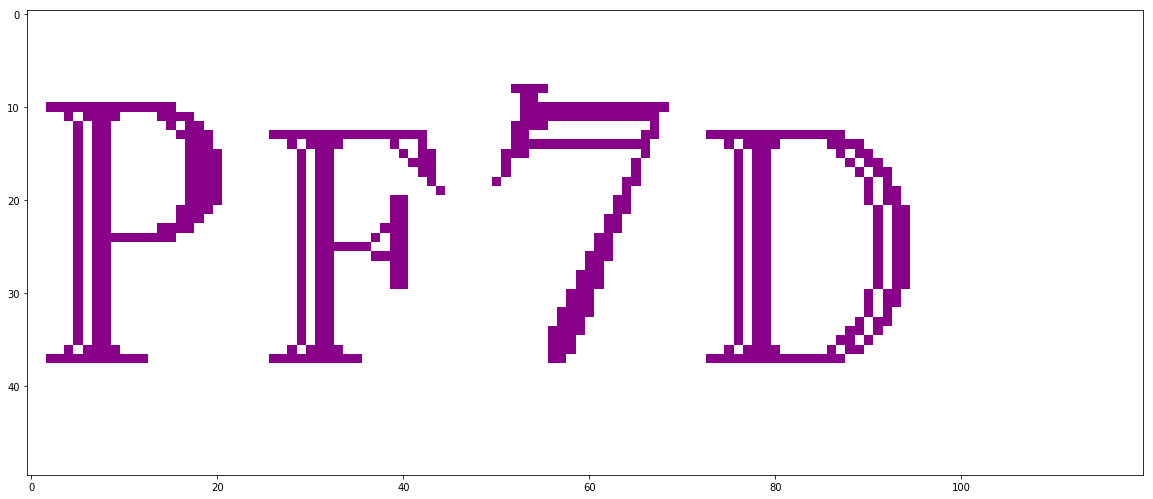

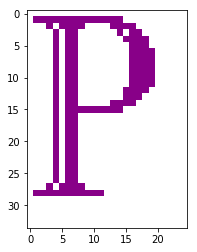

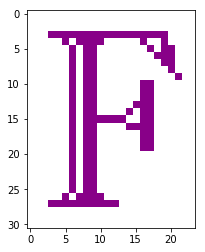

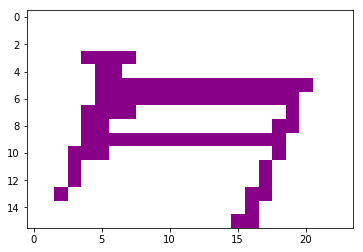

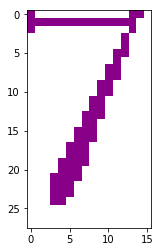

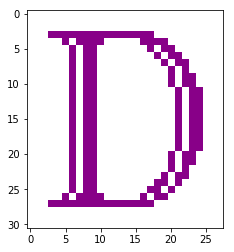

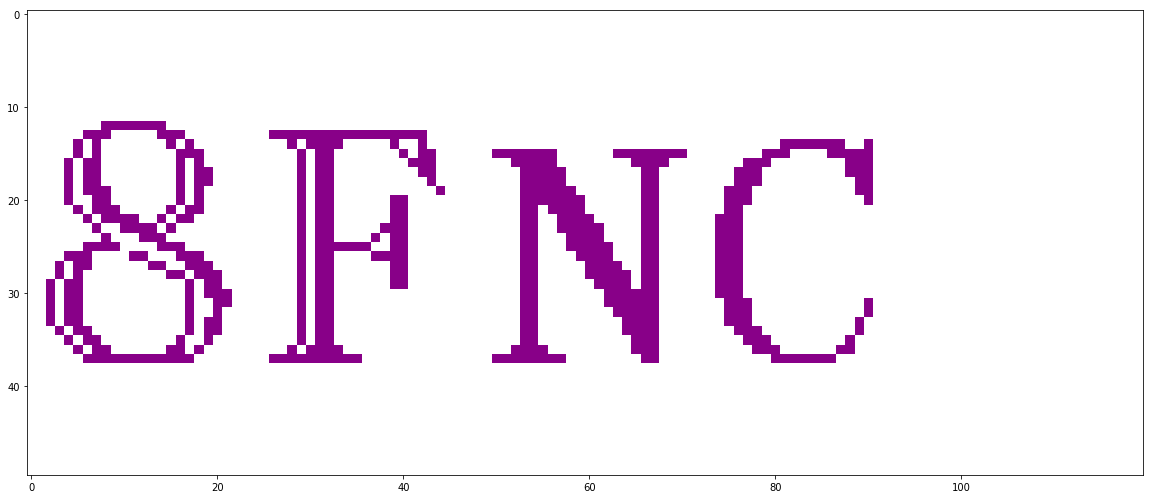

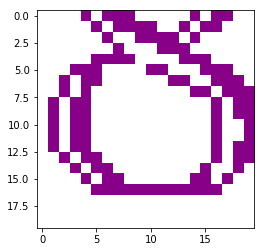

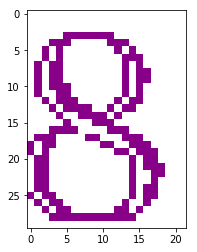

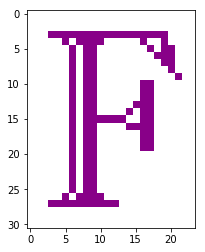

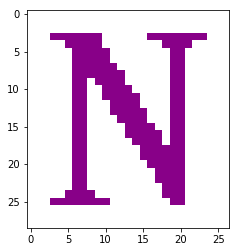

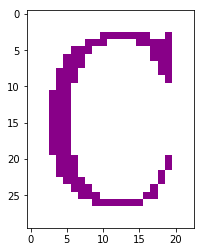

In [448]:
%pylab inline
import os
import PIL
import requests
import time
import cv2
from sklearn.preprocessing import StandardScaler
fig =plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)




for i in range(50):
    res=requests.get("https://waste.epa.gov.tw/export/include/CAPTCHA/CAPTCHA_image.asp?8776")
    with open(r"D:\trydata\textConsider\predict/aa.png",'wb') as f:
        f.write(res.content)




    pil_image =PIL.Image.open(r"D:\trydata\textConsider\predict/aa.png").convert("RGB")
    open_cv_image=numpy.array(pil_image)
    plt.imshow(open_cv_image)
    imgray=cv2.cvtColor(open_cv_image,cv2.COLOR_BGR2GRAY)
    ret, thresh=cv2.threshold(imgray,127,255,0)
    image,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnts=sorted([(c,cv2.boundingRect(c)[0]) for c in contours],key=lambda x:x[1])
    ary=[]
    for (c,_) in cnts:
        (x,y,w,h)=cv2.boundingRect(c)
    #         print((x,y,w,h))
        if w>11 and h>=7 and w!=120:
            if x-2>0:
                ary.append((x-2,y-2,w+4,h+4))
            else:
                ary.append((x,y,w+4,h+4))
    n=0
    for i in os.listdir(r"D:\trydata\textConsider\predict\numPic/"):
        os.remove(r"D:\trydata\textConsider\predict\numPic/"+i)

    for (x,y,w,h) in ary:
        fig=plt.figure()
        roi=open_cv_image[y:y+h,x:x+w]
        thresh=roi.copy()
    #     ax=fig.add
        plt.imshow(thresh)
        plt.savefig(r"D:\trydata\textConsider\predict\numPic/aa_{}.png".format(n),dpi=100)
        n+=1


    data=[]
    basewidth=50
    fig=plt.figure(figsize=(20,20))
    cnt=0
    for idx,img in enumerate(os.listdir(r"D:\trydata\textConsider\predict\numPic/")):
        pil_image=PIL.Image.open(r"D:\trydata\textConsider\predict\numPic\{}".format(img)).convert('1')
        wpercent=(basewidth/float(pil_image.size[0]))
        hsize=int((float(pil_image.size[1])*float(wpercent)))
        img=pil_image.resize((basewidth,hsize),PIL.Image.ANTIALIAS)
        data.append([pixel for pixel in iter(img.getdata())])

    scaler=StandardScaler()
    scaler.fit(data)
    data_scaled=scaler.transform(data)

    print(mlp.predict(data_scaled))

    print("".join(mlp.predict(data_scaled)).replace("xx",""))



    with open(r"D:\trydata\textConsider\predict/"+"".join(mlp.predict(data_scaled)).replace("xx","")+".png",'wb') as f:
        f.write(res.content)

2BK5.png
['2' 'xx' 'B' 'xx' 'K' '5']
2BK5


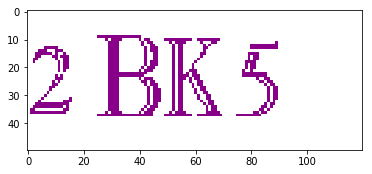

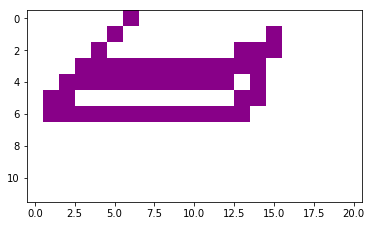

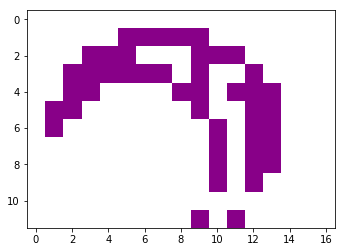

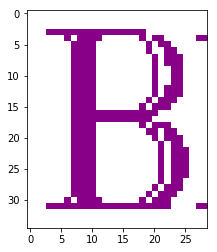

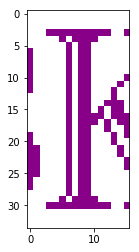

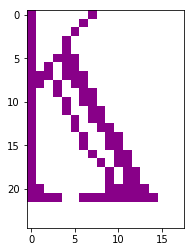

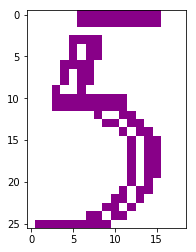

In [449]:
X=""
n=0
while 'png' not in X:
    X=os.listdir(r"D:\trydata\textConsider\predict")[n]
    print(X)
    n+=1
    if n >3:
        break
    
if 'png' in X:
    pil_image =PIL.Image.open(r"D:\trydata\textConsider\predict/"+X).convert("RGB")
    open_cv_image=numpy.array(pil_image)
    plt.imshow(open_cv_image)
    imgray=cv2.cvtColor(open_cv_image,cv2.COLOR_BGR2GRAY)
    ret, thresh=cv2.threshold(imgray,127,255,0)
    image,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnts=sorted([(c,cv2.boundingRect(c)[0]) for c in contours],key=lambda x:x[1])
    ary=[]
    for (c,_) in cnts:
        (x,y,w,h)=cv2.boundingRect(c)
    #         print((x,y,w,h))
        if w>11 and h>=7 and w!=120:
            if x-2>0:
                ary.append((x-2,y-2,w+4,h+4))
            else:
                ary.append((x,y,w+4,h+4))
    n=0
    for i in os.listdir(r"D:\trydata\textConsider\predict\numPic/"):
        os.remove(r"D:\trydata\textConsider\predict\numPic/"+i)

    for (x,y,w,h) in ary:
        fig=plt.figure()
        roi=open_cv_image[y:y+h,x:x+w]
        thresh=roi.copy()
    #     ax=fig.add
        plt.imshow(thresh)
        plt.savefig(r"D:\trydata\textConsider\predict\numPic/aa_{}.png".format(n),dpi=100)
        n+=1


    data=[]
    basewidth=50
    fig=plt.figure(figsize=(20,20))
    cnt=0
    for idx,img in enumerate(os.listdir(r"D:\trydata\textConsider\predict\numPic/")):
        pil_image=PIL.Image.open(r"D:\trydata\textConsider\predict\numPic\{}".format(img)).convert('1')
        wpercent=(basewidth/float(pil_image.size[0]))
        hsize=int((float(pil_image.size[1])*float(wpercent)))
        img=pil_image.resize((basewidth,hsize),PIL.Image.ANTIALIAS)
        data.append([pixel for pixel in iter(img.getdata())])

    scaler=StandardScaler()
    scaler.fit(data)
    data_scaled=scaler.transform(data)

    print(mlp.predict(data_scaled))
    print("".join(mlp.predict(data_scaled)).replace("xx",""))


    os.remove(r"D:\trydata\textConsider\predict/"+X)